# test the clustering performance

In [ ]:
# toPkl(ad, 'ad_for_test_clustering_performance', 'ipf', dir_path=dir_temp)

2023-11-23 20:29:58.535 | INFO     | jpy_tools.otherTools:toPkl:477 - please run `loadPkl('ad_for_test_clustering_performance', lambda **dt:sc.read_h5ad(**dt), arg_path='filename')` to get object


In [ ]:
toPkl(ad, 'ad_for_test_clustering_performance_1124', 'ipf', dir_path=dir_temp)

2023-11-24 14:42:07.496 | INFO     | jpy_tools.otherTools:toPkl:477 - please run `loadPkl('ad_for_test_clustering_performance_1124', lambda **dt:sc.read_h5ad(**dt), arg_path='filename')` to get object


In [ ]:
ad = loadPkl('ad_for_test_clustering_performance', lambda **dt:sc.read_h5ad(**dt), arg_path='filename', dir_path=dir_temp)

In [ ]:
pad = singleCellTools.plotting.PlotAnndata(ad, 'sx')

2023-12-03 14:00:34 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-03 14:00:34 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-03 14:00:34 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-03 14:00:34 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-03 14:00:34 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

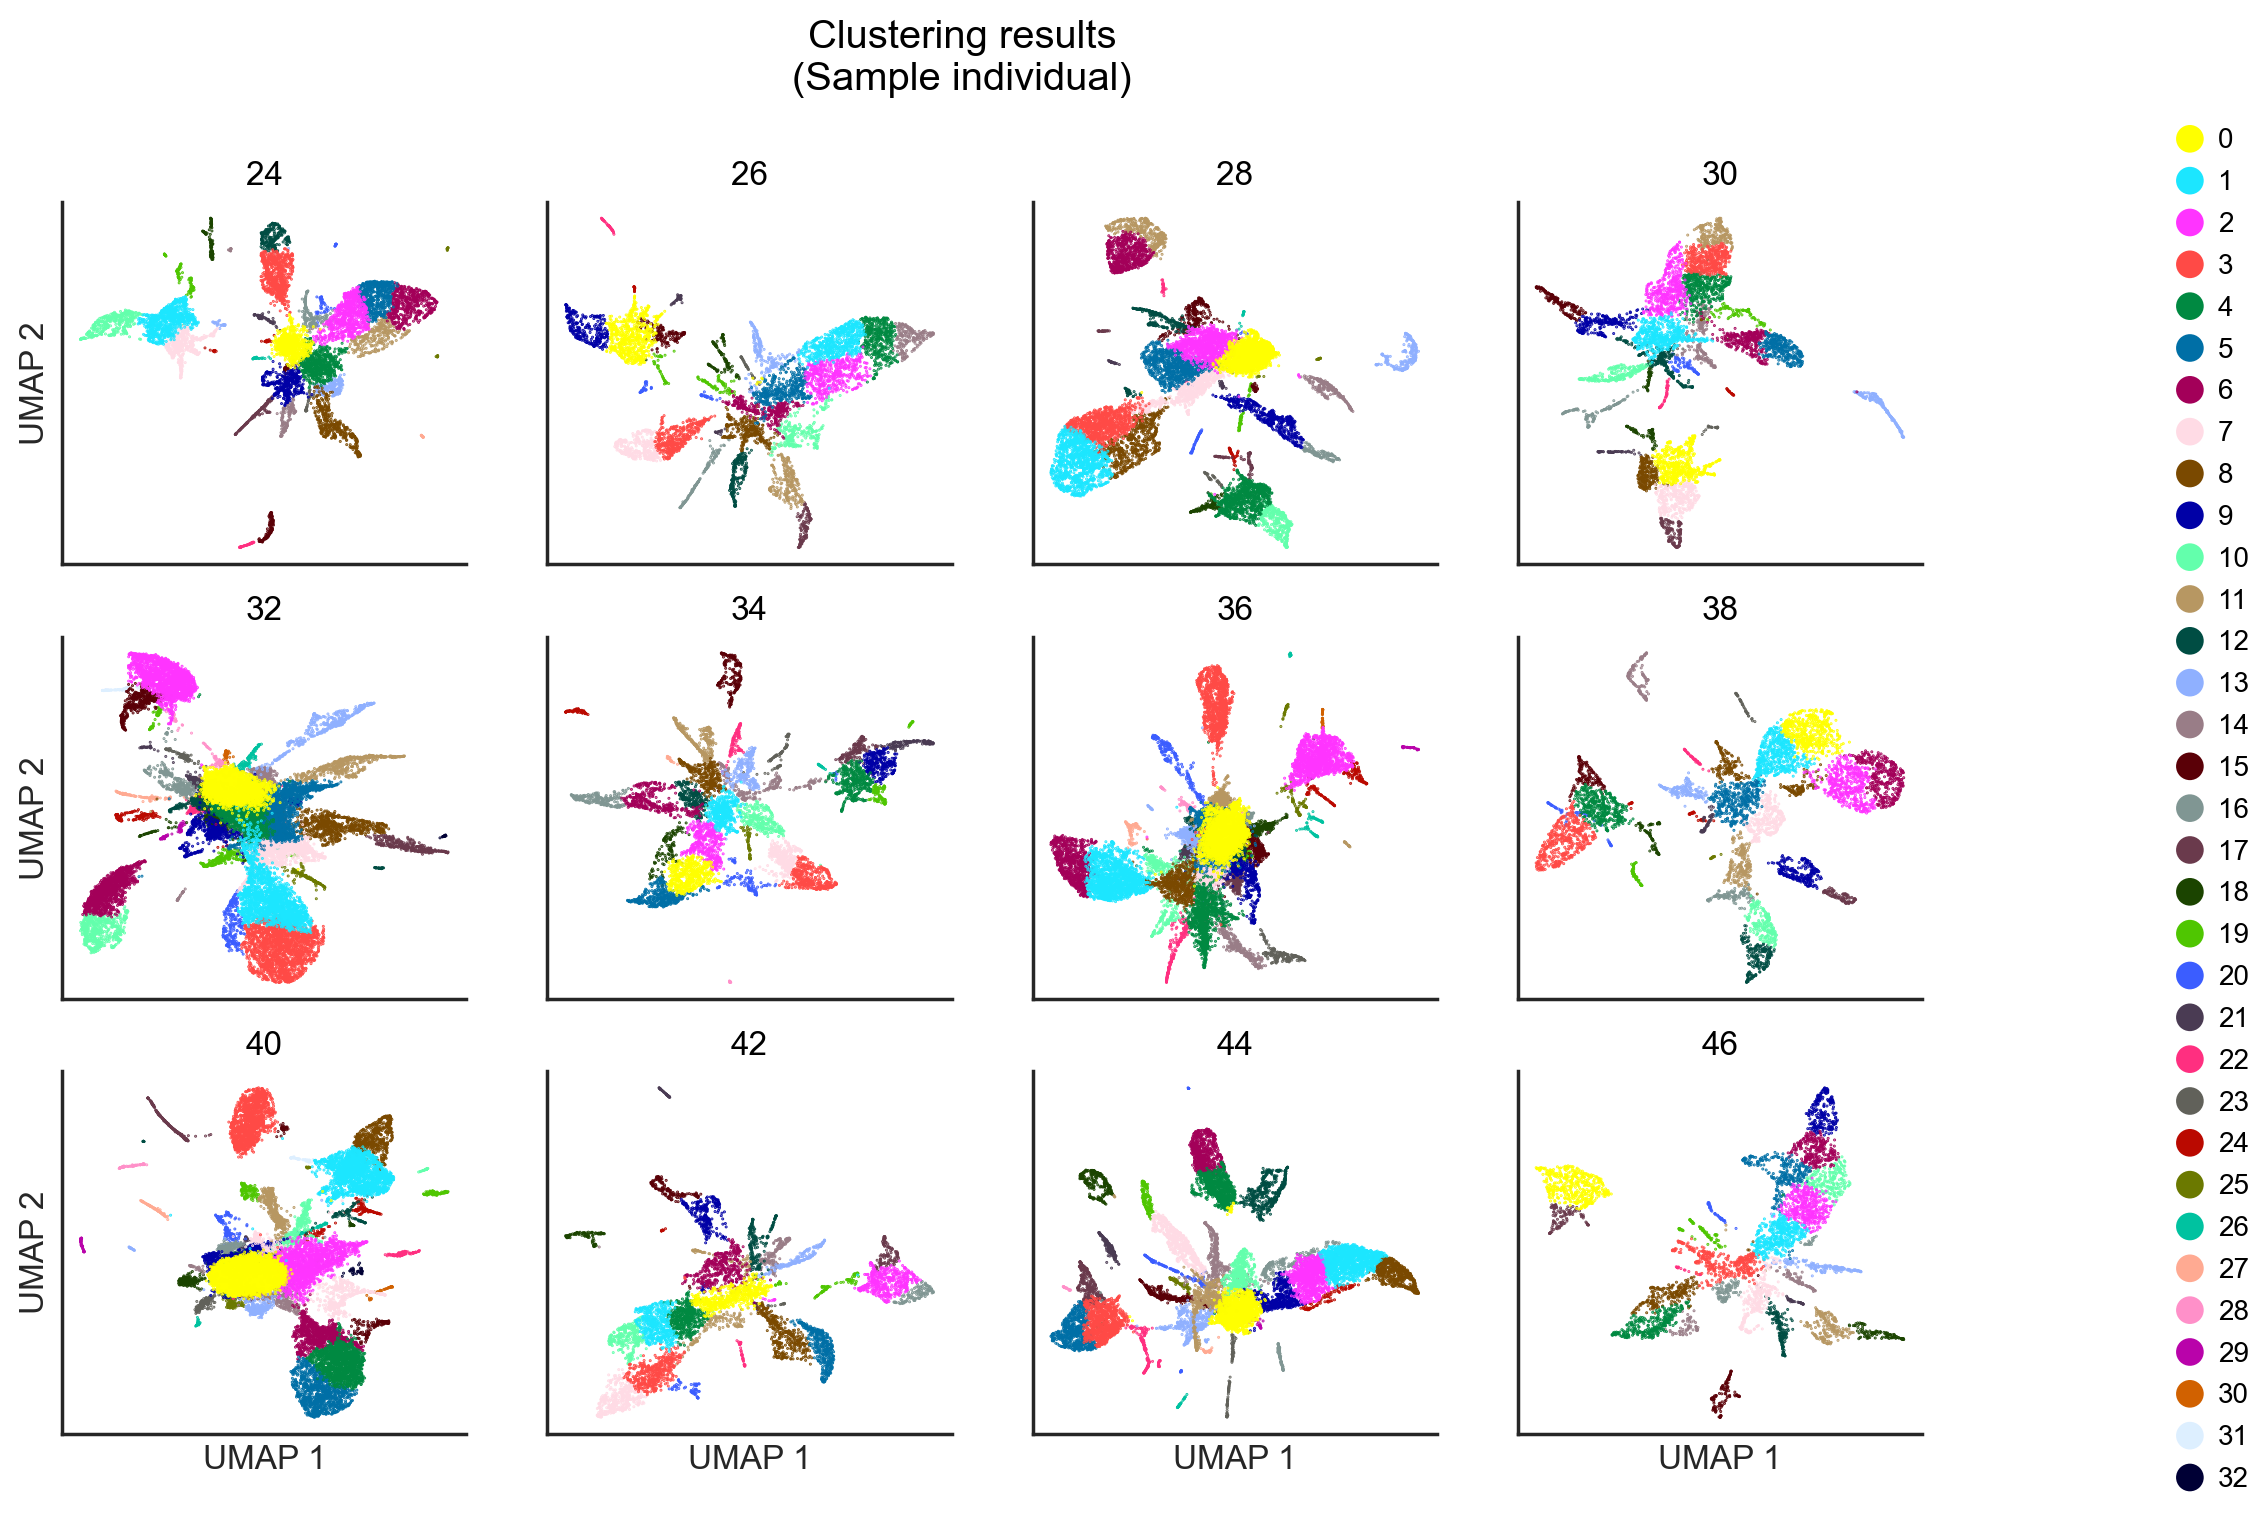

In [ ]:
pad.embedding(
    'X_umap_each_cluster', color='leiden_each_cluster', groupby='CT', wrap=4, size=0.3, figsize=(12, 8), title='Clustering results\n(Sample individual)', share=False
)[1]

In [ ]:
ad_sub = sc.pp.subsample(ad, n_obs=30000, copy=True)

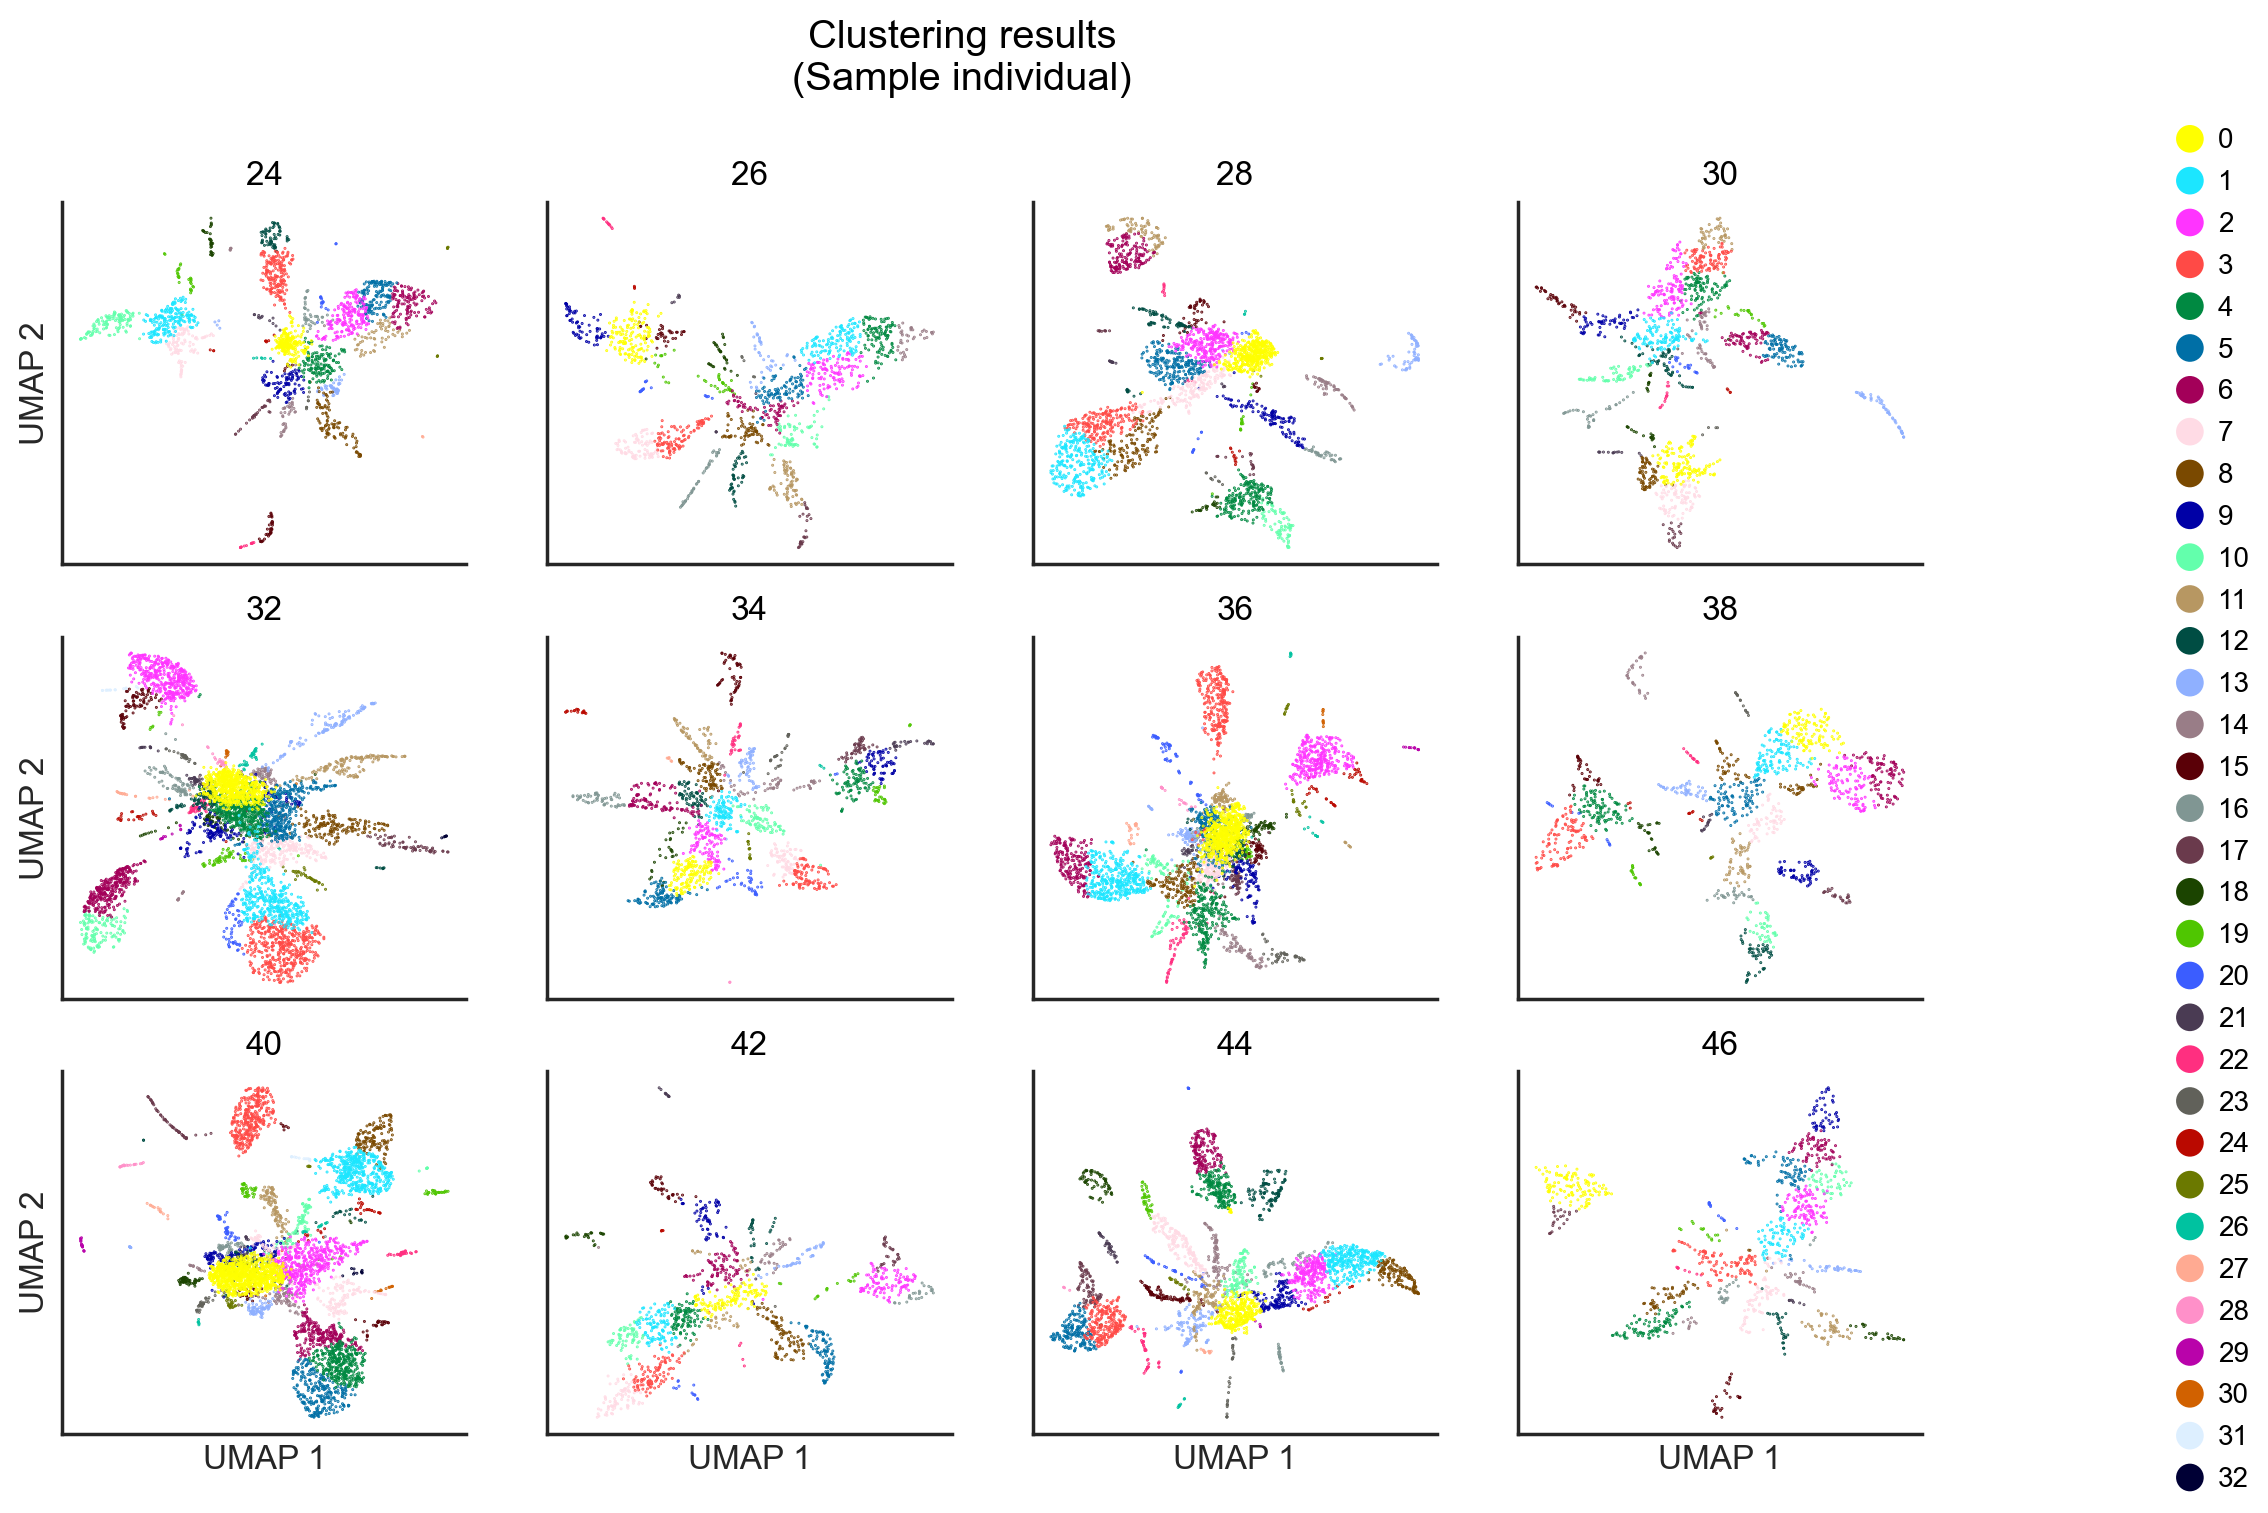

In [ ]:
singleCellTools.plotting.PlotAnndata(ad_sub, 'sx').embedding(
    'X_umap_each_cluster', color='leiden_each_cluster', groupby='CT', wrap=4, size=0.3, figsize=(12, 8), title='Clustering results\n(Sample individual)', share=False
)[1]

In [ ]:
def calculateDistance(ad, iObsm, oObsp=None, metric='euclidean', nPc=30):
    import sklearn
    if oObsp is None:
        oObsp = iObsm + '_distance'
    ar_embed = ad.obsm[iObsm][:, :nPc]
    ar_distance = sklearn.metrics.pairwise_distances(ar_embed, metric=metric)
    ad.obsp[oObsp] = ar_distance

In [ ]:
def getSilhouette(ad, iObsp, oObsm=None, groupby='CT', clusterKey='leiden_each_cluster'):
    import sklearn
    if oObsm is None:
        oObsm = iObsp + '_ss'
    lsDf = []
    for group, _ad in singleCellTools.basic.splitAdata(ad, groupby, needName=True, copy=False):
        _df = pd.DataFrame(index=_ad.obs.index.copy())
        _df['silhouette'] = sklearn.metrics.silhouette_samples(_ad.obsp[iObsp], _ad.obs[clusterKey], metric='precomputed')
        _df['CT'] = group
        lsDf.append(_df)
    ad.obsm[oObsm] = pd.concat(lsDf).reindex(ad.obs.index)

In [ ]:
def getKbetRes(ad, iObsm, oObsm=None, clusterKey='CT'):
    import scib_metrics
    if oObsm is None:
        oObsm = iObsm + '_kbet'
    ad_temp = sc.pp.neighbors(ad, n_pcs=30, use_rep=iObsm, copy=True)
    _, stat_mean, pvalue_mean = scib_metrics.kbet(ad_temp.obsp['distances'], ad.obs['CT'])
    df = pd.DataFrame(index=ad.obs.index.copy())
    df['kbet'] = stat_mean
    df['pvalue'] = pvalue_mean
    ad.obsm[oObsm] = df.reindex(ad.obs.index)



In [ ]:
def getIlisiRes(ad, iObsm, oObsm=None, clusterKey='CT'):
    import scib_metrics
    if oObsm is None:
        oObsm = iObsm + '_kbet'
    ad_temp = sc.pp.neighbors(ad, n_pcs=30, use_rep=iObsm, copy=True)
    return scib_metrics.ilisi_knn(ad_temp.obsp['distances'], ad.obs['CT'])


In [ ]:
def getConnectRes(ad, iObsm, oObsm=None, clusterKey='CT'):
    import scib_metrics
    if oObsm is None:
        oObsm = iObsm + '_kbet'
    ad_temp = sc.pp.neighbors(ad, n_pcs=30, use_rep=iObsm, copy=True)
    return [scib_metrics.graph_connectivity(ad_temp.obsp['connectivities'], ad.obs['CT']), scib_metrics.graph_connectivity(ad_temp.obsp['distances'], ad.obs['CT'])]


In [ ]:
ad_sub

AnnData object with n_obs × n_vars = 30000 × 24503
    obs: 'ambientRnaFractionEstimatedBySoupx', 'Sample', 'CT', 'n_genes', 'n_counts', 'percent_ct', 'outlier', 'Batch', 'leiden', 'prev_celltype', 'Cluster', 'celltype', 'leiden_0.05', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.25', 'leiden_0.3', 'leiden_0.35', 'leiden_0.4', 'leiden_0.45', 'leiden_0.5', 'leiden_0.55', 'leiden_0.6', 'leiden_0.65', 'leiden_0.7', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.05', 'leiden_1.1', 'leiden_1.15', 'leiden_1.2', 'leiden_1.25', 'leiden_1.3', 'leiden_1.35', 'leiden_1.4', 'leiden_1.45', 'leiden_1.5', 'leiden_subcluster', 'recluster_ct', 'temp_batch', 'temp_split', 'leiden_mask_all_circadian', 'leiden_harmony_each_sample', 'leiden_each_cluster', 'AT3G09600', 'AT3G54500', 'AT2G46830', 'AT5G02810', 'AT1G01060', 'AT5G61380', 'AT5G64170', 'AT5G60100', 'AT1G22770', 'AT5G02840', 'AT2G25930', 'AT2G46790', 'AT2G40080', 'AT5G24470', 'AT5G59570', 'A

In [ ]:
_dt = {
    # "X_pca_harmony_sx":"SCTransform (Sample) + Harmony",
    "X_pca_only_concate": "Only Concatenate",
    # "X_pca_only_harmony":"Concatenate + Harmony",
    "X_pca_only_concat_remove_circadian": "Concatenate + Remove Circadian Genes",
    # "X_pca_harmony_remove_circadian": "Concatenate + Remove Circadian Genes + Harmony",
    # "X_pca_sct_batch": "SCTransform (Batch)",
    # "X_pca_sct_batch_level_regress_core" : "SCTransform (Batch) + Regress Core Clock Genes",
    # "X_pca_sct_batch_level_regress_core_harmony": "SCTransform (Batch) + Regress Core Clock Genes + Harmony",
    "X_pca_only_concat_remove_random": "Concatenate + Remove Random Genes",
}

In [ ]:
_ls_order = [
    # "SCTransform (Sample) + Harmony",
    "Only Concatenate",
    # "Concatenate + Harmony",
    "Concatenate + Remove Circadian Genes",
    # "Concatenate + Remove Circadian Genes + Harmony",
    # "SCTransform (Batch)",
    # "SCTransform (Batch) + Regress Core Clock Genes",
    # "SCTransform (Batch) + Regress Core Clock Genes + Harmony",
    "Concatenate + Remove Random Genes"
]

In [ ]:
_ls = [
    # "X_pca_harmony_sx",
    "X_pca_only_concate",
    # "X_pca_only_harmony",
    "X_pca_only_concat_remove_circadian",
    # "X_pca_harmony_remove_circadian",
    # "X_pca_sct_batch",
    # "X_pca_sct_batch_level_regress_core",
    # "X_pca_sct_batch_level_regress_core_harmony",
    "X_pca_only_concat_remove_random"
]

In [ ]:
import tqdm
for obsm in tqdm.tqdm(_ls):
    calculateDistance(ad_sub, obsm)

100%|██████████| 3/3 [00:50<00:00, 16.75s/it]


In [ ]:
import tqdm
for obsm in tqdm.tqdm(_ls):
    getSilhouette(ad_sub, obsm + '_distance')

100%|██████████| 3/3 [00:11<00:00,  3.88s/it]


In [ ]:
del(ad_sub.obsp)

In [ ]:
import gc;gc.collect()

142675

In [ ]:
import tqdm
for obsm in tqdm.tqdm(_ls):
    getKbetRes(ad_sub, obsm)

  0%|          | 0/3 [00:00<?, ?it/s]

2023-12-07 18:39:28 - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-12-07 18:39:28 - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-12-07 18:39:33 - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-12-07 18:39:33 - WARNING - No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
100%|██████████| 3/3 [00:46<00:00, 15.64s/it]


In [ ]:
import tqdm
dt_ilisi = {}
for obsm in tqdm.tqdm(_ls):
    dt_ilisi[obsm] = getIlisiRes(ad_sub, obsm)
{_dt[x]:y for x,y in dt_ilisi.items()}

 33%|███▎      | 1/3 [00:12<00:24, 12.49s/it]

100%|██████████| 3/3 [00:36<00:00, 12.31s/it]


{'Only Concatenate': 0.0790667317130349,
 'Concatenate + Remove Circadian Genes': 0.0977416688745672,
 'Concatenate + Remove Random Genes': 0.07663141597401012}

In [ ]:
lsDf = []
for obsm in _ls:
    _df = ad_sub.obsm[f"{obsm}_distance_ss"]
    _df['method'] = _dt[obsm]
    lsDf.append(_df)
df_silhouette = pd.concat(lsDf).sort_values("CT")

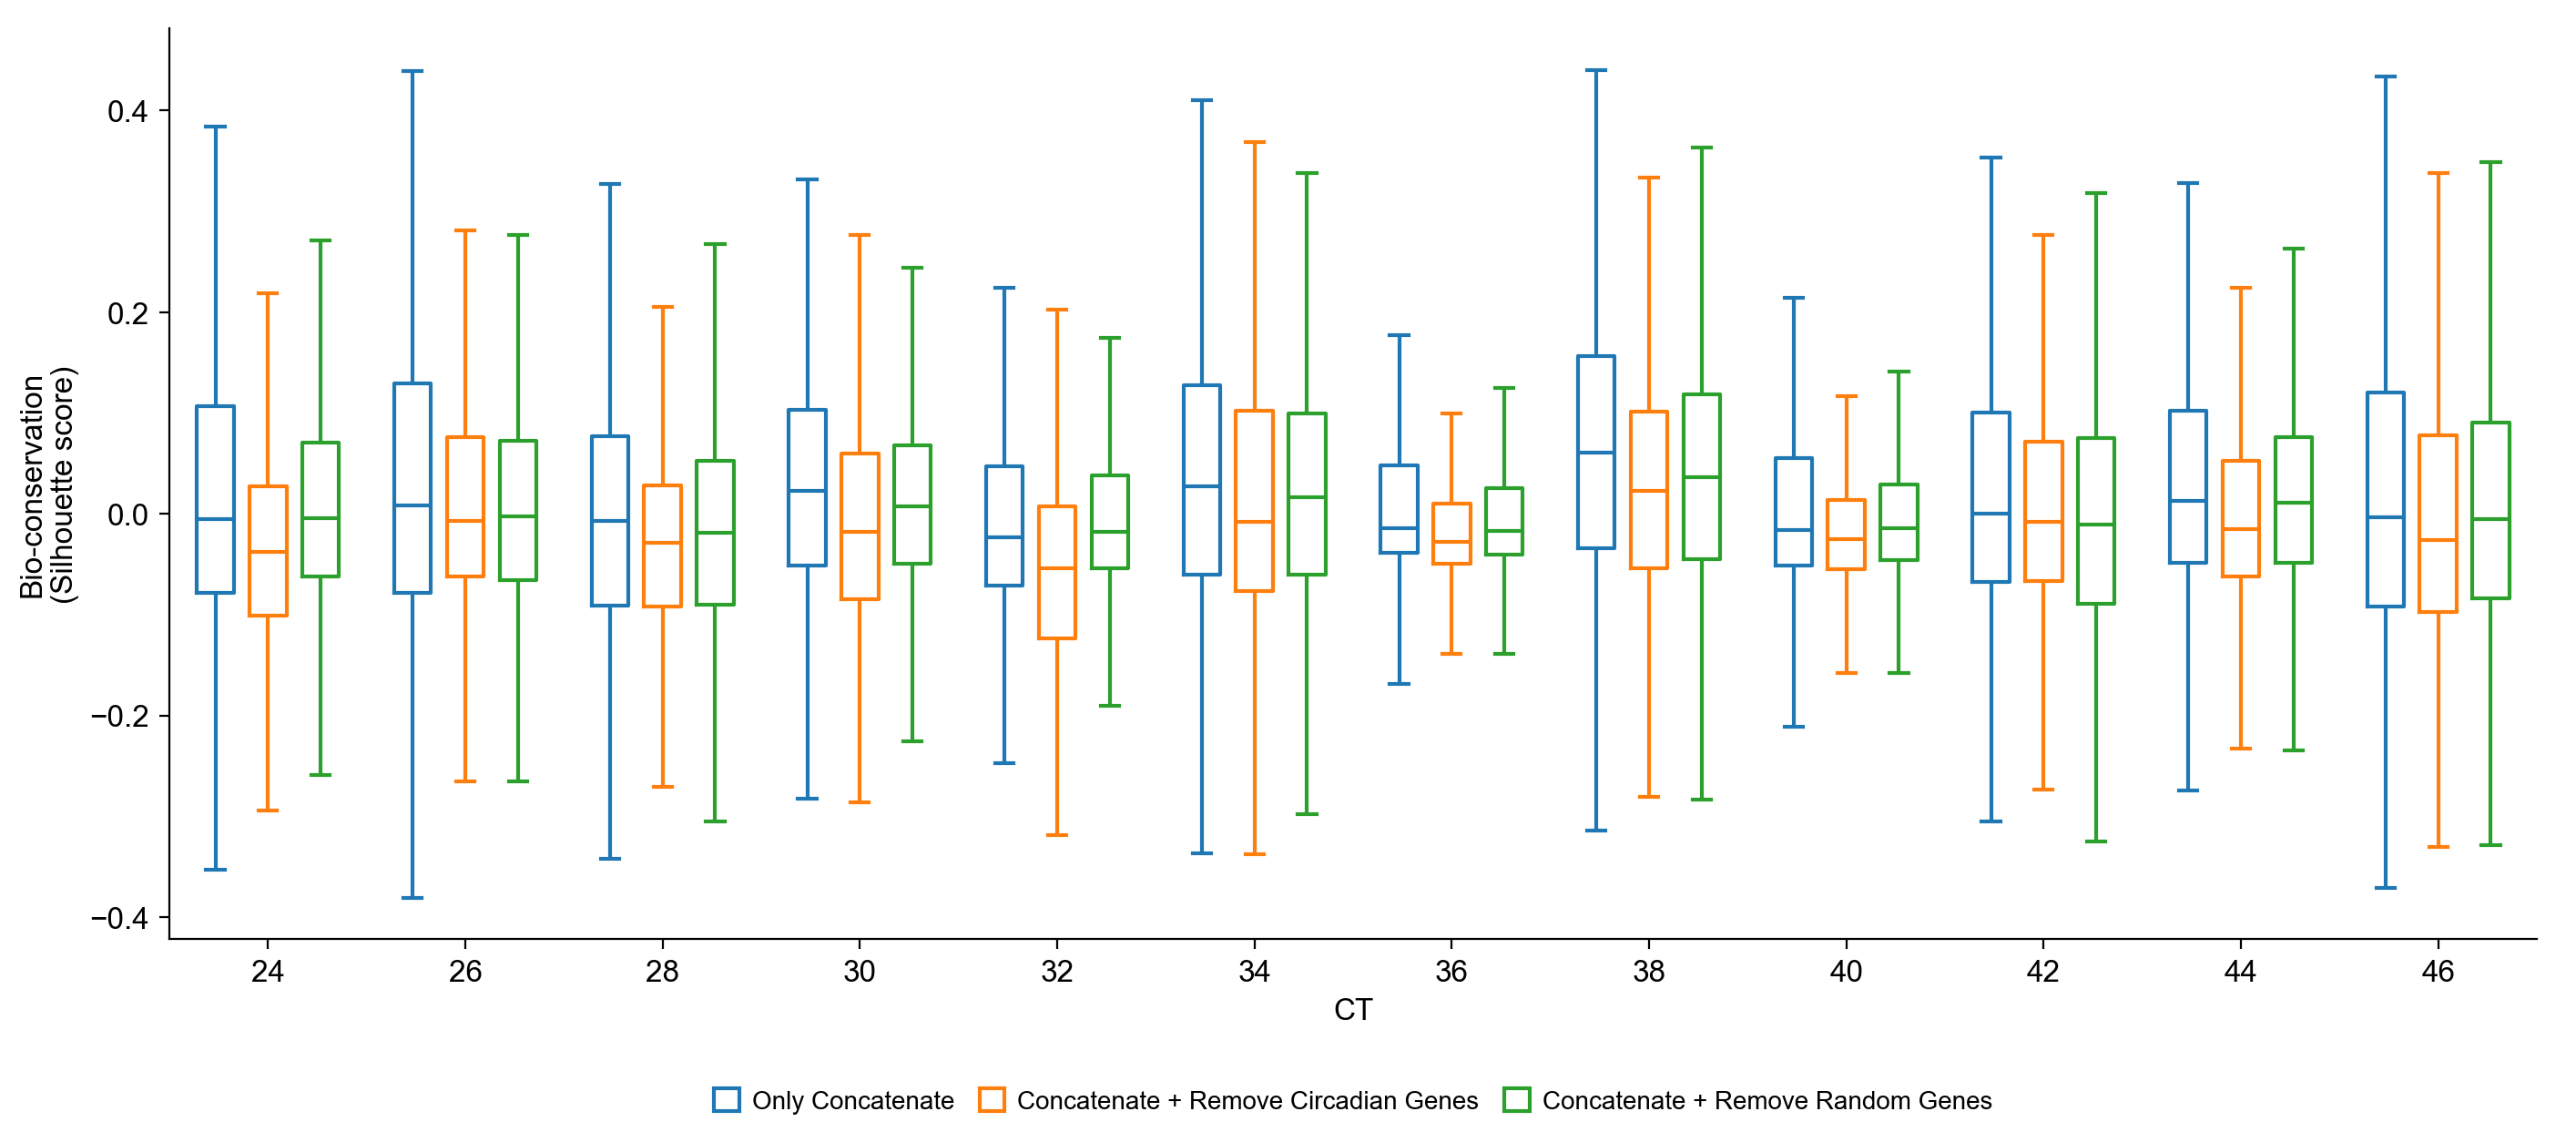

In [ ]:
# fig, ax = plt.subplots(figsize=(12,5))
bk = pw.Brick(figsize=(13,5))
sns.boxplot(df_silhouette, x='CT', y='silhouette', hue='method', fill=False, showfliers=False, ax=bk, hue_order=_ls_order, gap=0.3)
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Bio-conservation\n(Silhouette score)")
bk1 = bk
pwShow(bk1)

2023-12-03 14:06:21 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-03 14:06:22 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


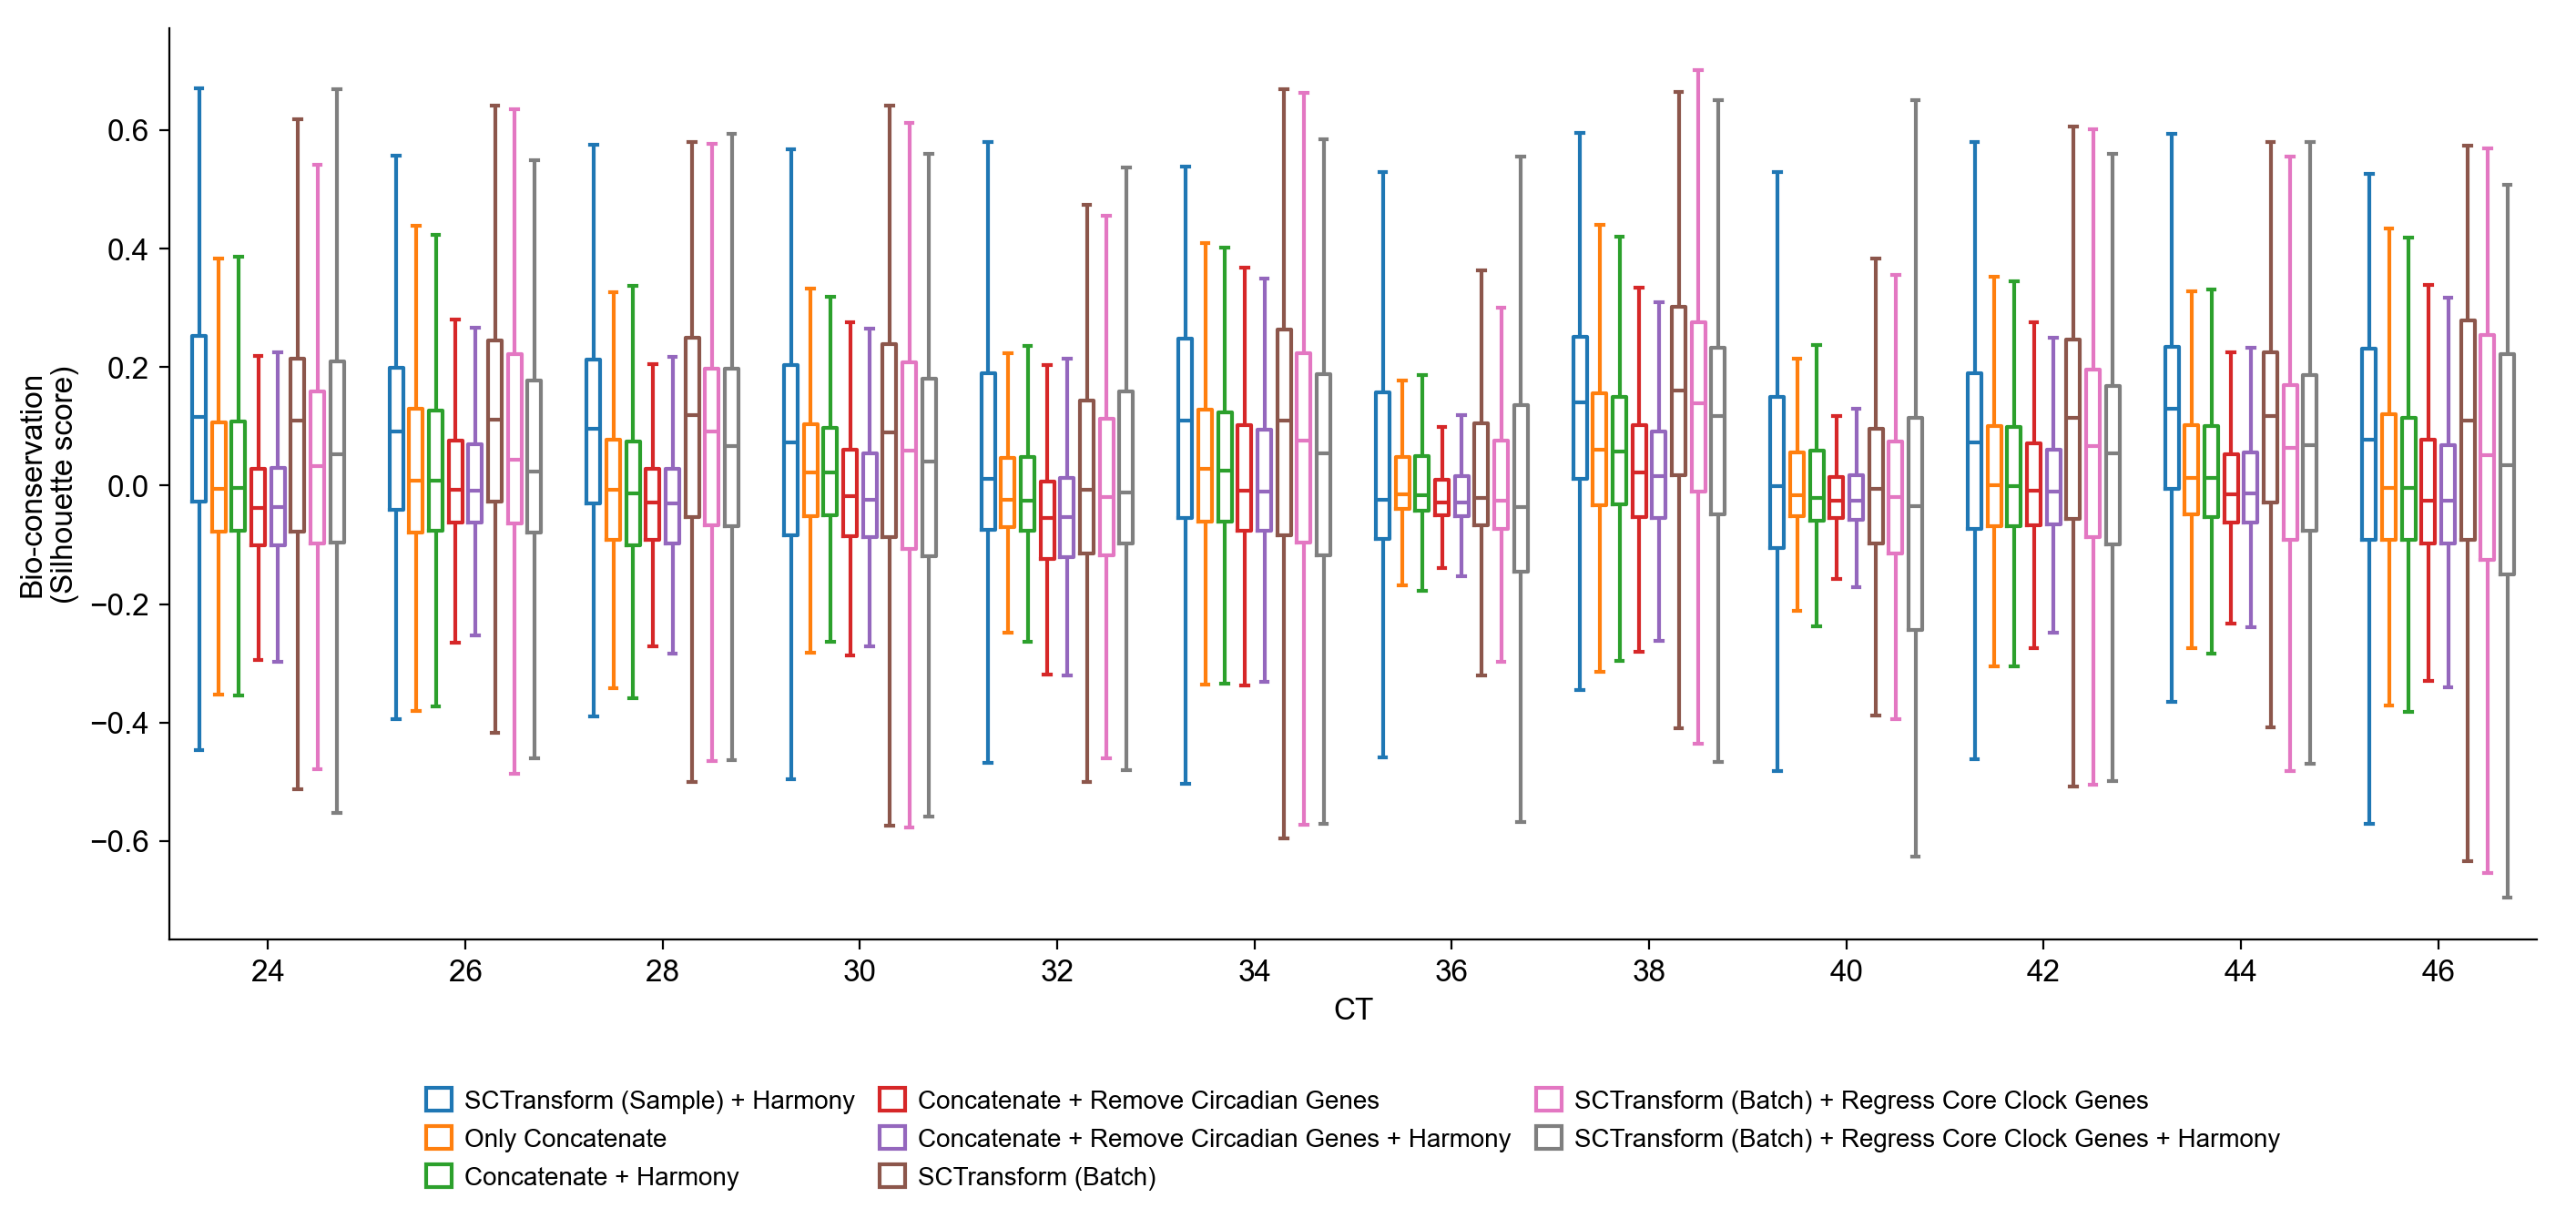

In [ ]:
# fig, ax = plt.subplots(figsize=(12,5))
bk = pw.Brick(figsize=(13,5))
sns.boxplot(df_silhouette, x='CT', y='silhouette', hue='method', fill=False, showfliers=False, ax=bk, hue_order=_ls_order, gap=0.3)
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Bio-conservation\n(Silhouette score)")
bk1 = bk
pwShow(bk1)

In [ ]:
_df = df_silhouette.groupby(["method", "CT"])['silhouette'].agg('mean').rename("silhouette").reset_index()

In [ ]:
plt.set_loglevel("Warning")

In [ ]:
# (
#     so.Plot(df_silhouette, x='CT', y='silhouette', color='method')
#     .add(so.Dot(), so.Agg(), so.Dodge())
#     .add(so.Range(), so.Est(), so.Dodge())
#     .scale(color=so.Nominal(values=sns.palettes.color_palette(), order=_ls_order))
#     .layout(size=(13, 5))
# )

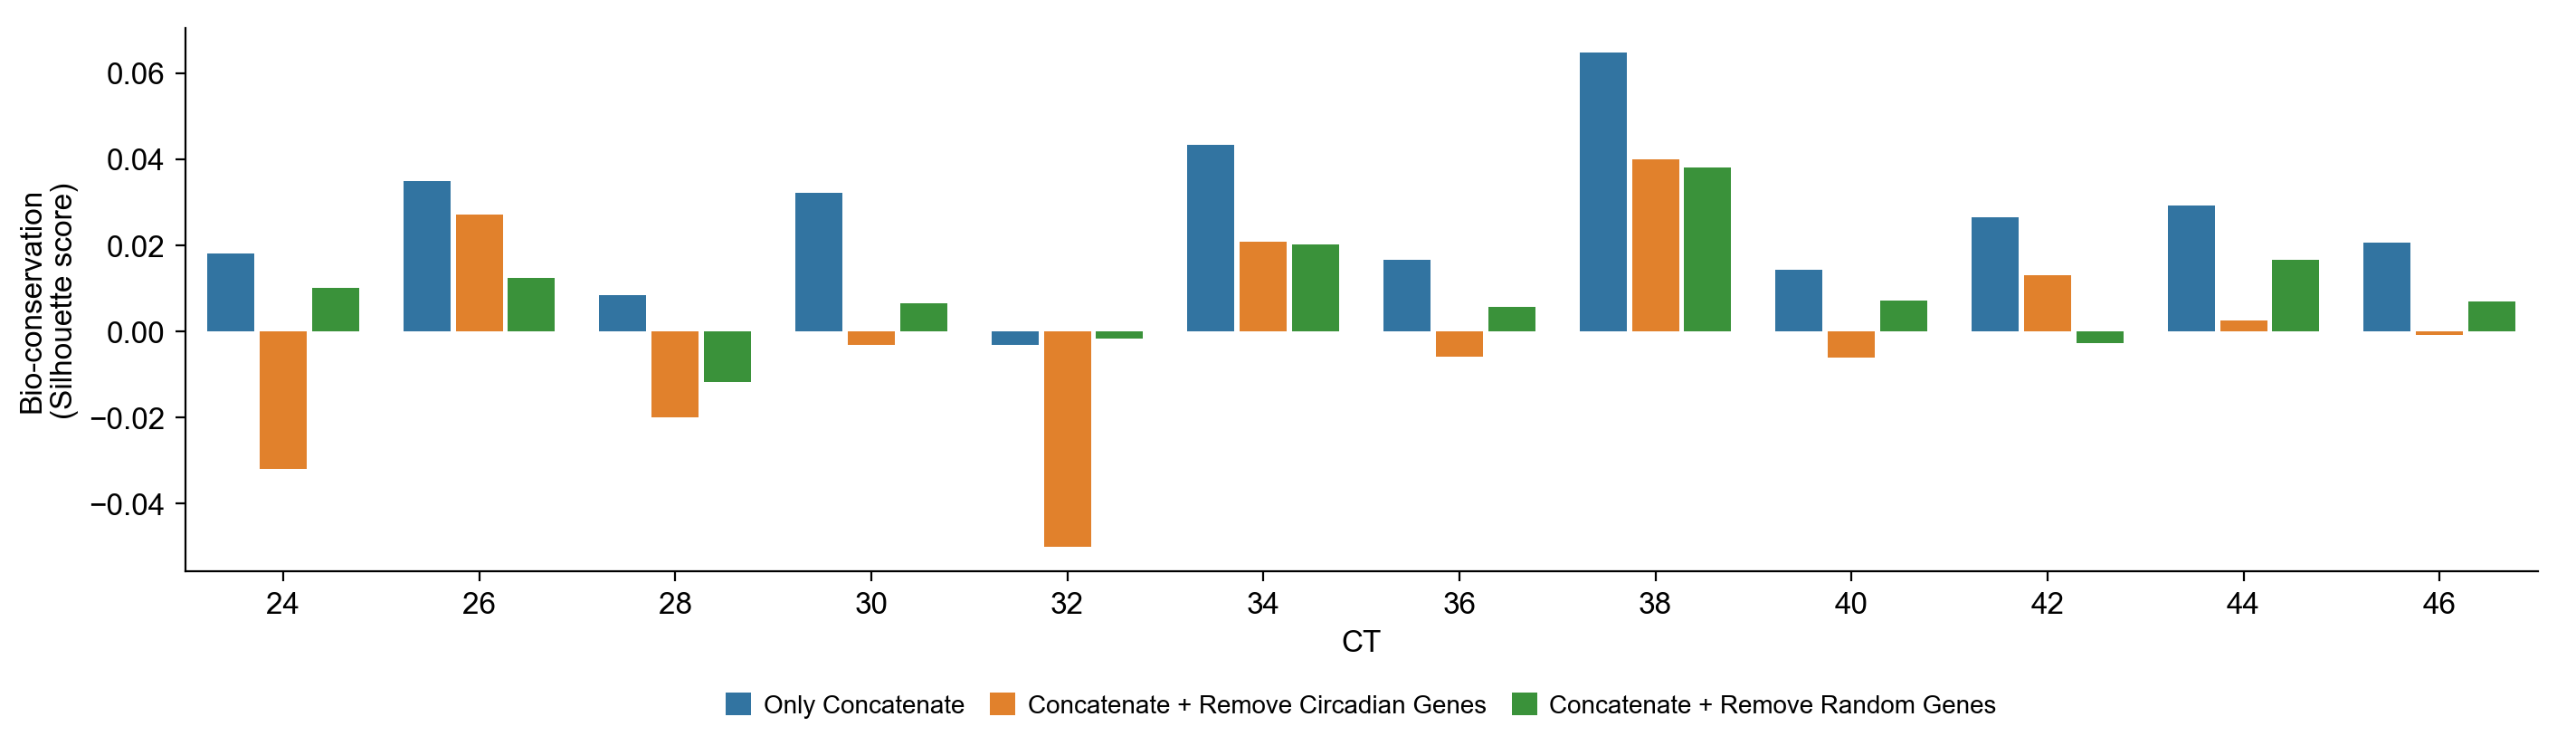

In [ ]:
# fig, ax = plt.subplots(figsize=(12,5))
bk = pw.Brick(figsize=(13,3))
sns.barplot(_df, x='CT', y='silhouette', hue='method', ax=bk, hue_order=_ls_order, gap=0.1)
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Bio-conservation\n(Silhouette score)")
bk1 = bk
pwShow(bk1)

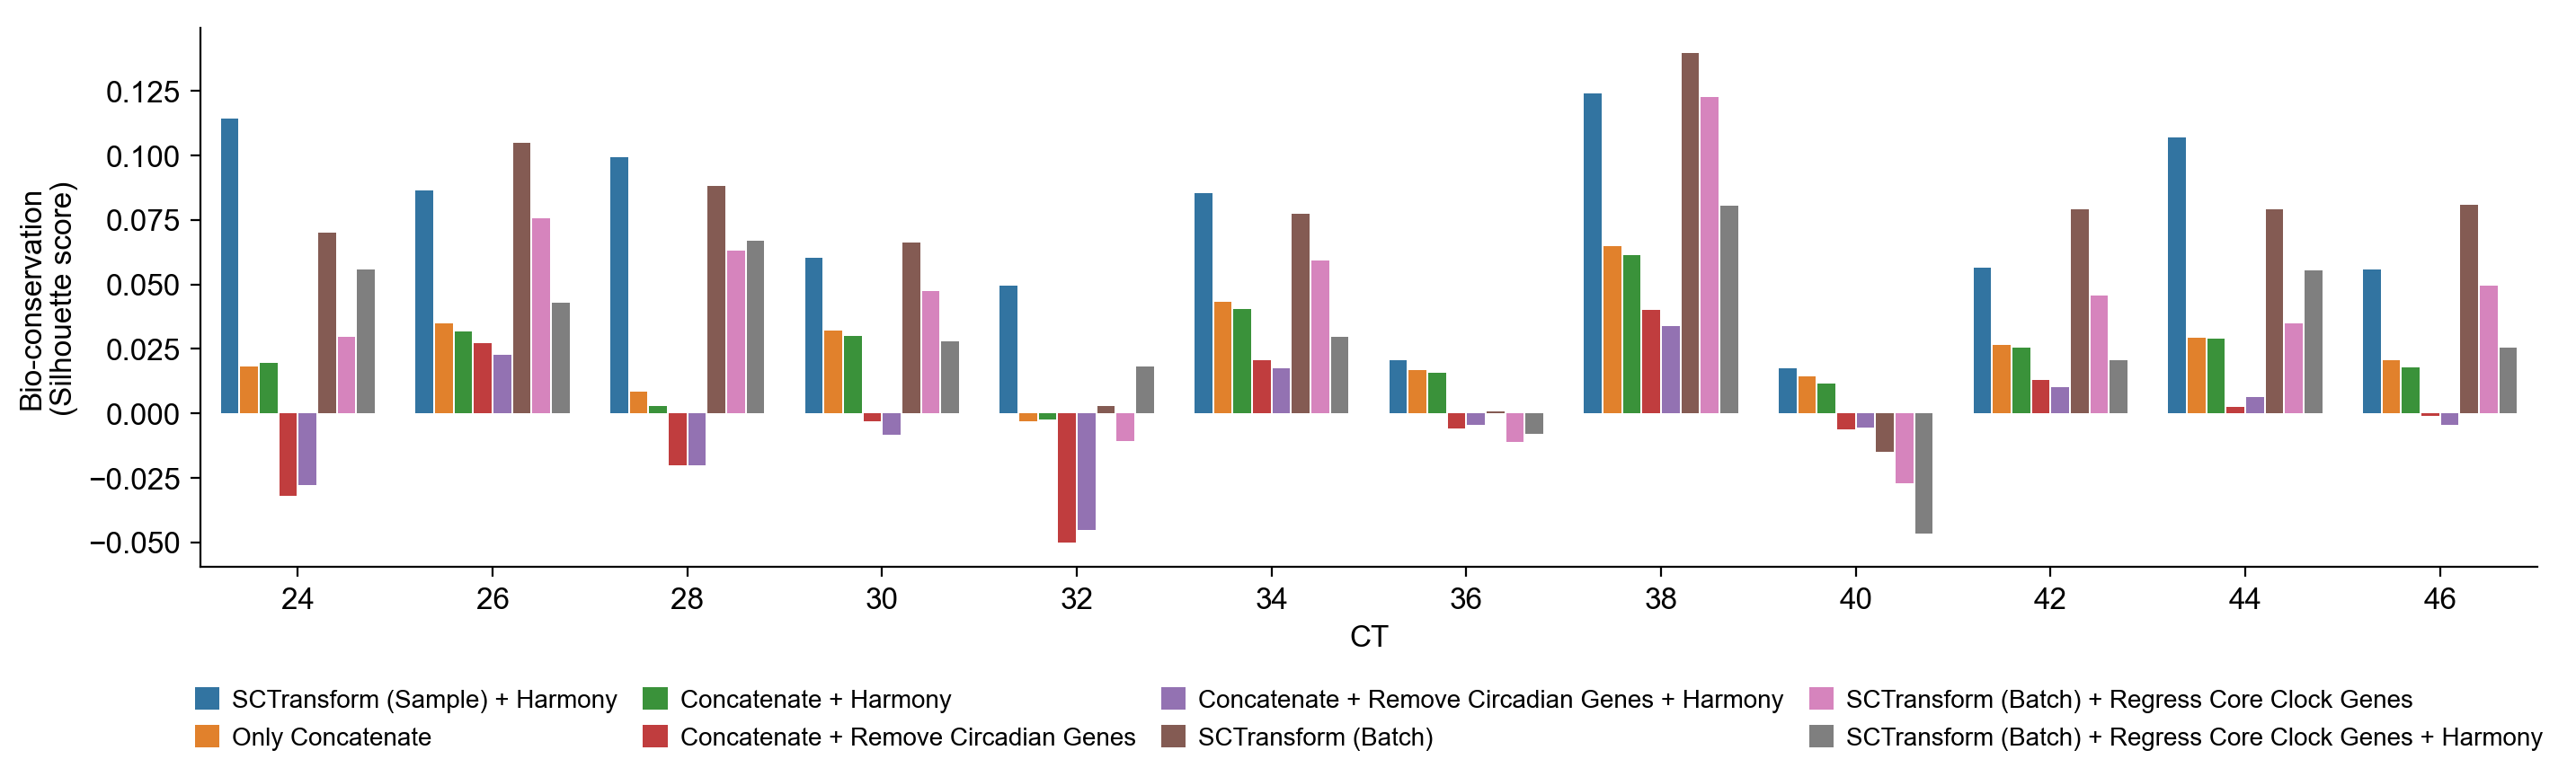

In [ ]:
# fig, ax = plt.subplots(figsize=(12,5))
bk = pw.Brick(figsize=(13,3))
sns.barplot(_df, x='CT', y='silhouette', hue='method', ax=bk, hue_order=_ls_order, gap=0.1)
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Bio-conservation\n(Silhouette score)")
bk1 = bk
pwShow(bk1)

In [ ]:
lsDf = []
for x in _ls:
    _df = ad_sub.obsm[f'{x}_kbet'].assign(method=_dt.get(x,x)).assign(CT = ad_sub.obs['CT'])
    lsDf.append(_df)
df_kbet = pd.concat(lsDf)
df_kbet = df_kbet.sort_values("CT")
df_kbet

,kbet,pvalue,method,CT
TTTGGTTAGTGCTAGG-1-8,27.637848,0.003677,Concatenate + Remove Random Genes,24
ACTGCAAAGACATATG-1-8,36.485954,0.000140,Concatenate + Remove Circadian Genes,24
AGATCCAGTCTTGGTA-1-8,9.427360,0.582509,Concatenate + Remove Circadian Genes,24
TTTCATGTCATGCGGC-1-8,8.775918,0.642568,Concatenate + Remove Random Genes,24
TGATGGTAGCTCGACC-1-8,16.616245,0.119750,Concatenate + Remove Circadian Genes,24
...,...,...,...,...
TACGGGCCATGGTGGA-1-6,23.659512,0.014248,Concatenate + Remove Circadian Genes,46
ATCATTCGTCGCTTGG-1-6,11.205149,0.426239,Concatenate + Remove Circadian Genes,46
AGCGATTAGCCATGCC-1-6,22.629763,0.019924,Concatenate + Remove Circadian Genes,46
AGGTTACTCCCATGGG-1-6,163.142273,0.000000,Concatenate + Remove Random Genes,46


In [ ]:
_df = df_kbet.groupby(["method", "CT"])['pvalue'].agg(lambda _: (_ >= 0.05).mean()).rename("AcceptanceRate").reset_index()

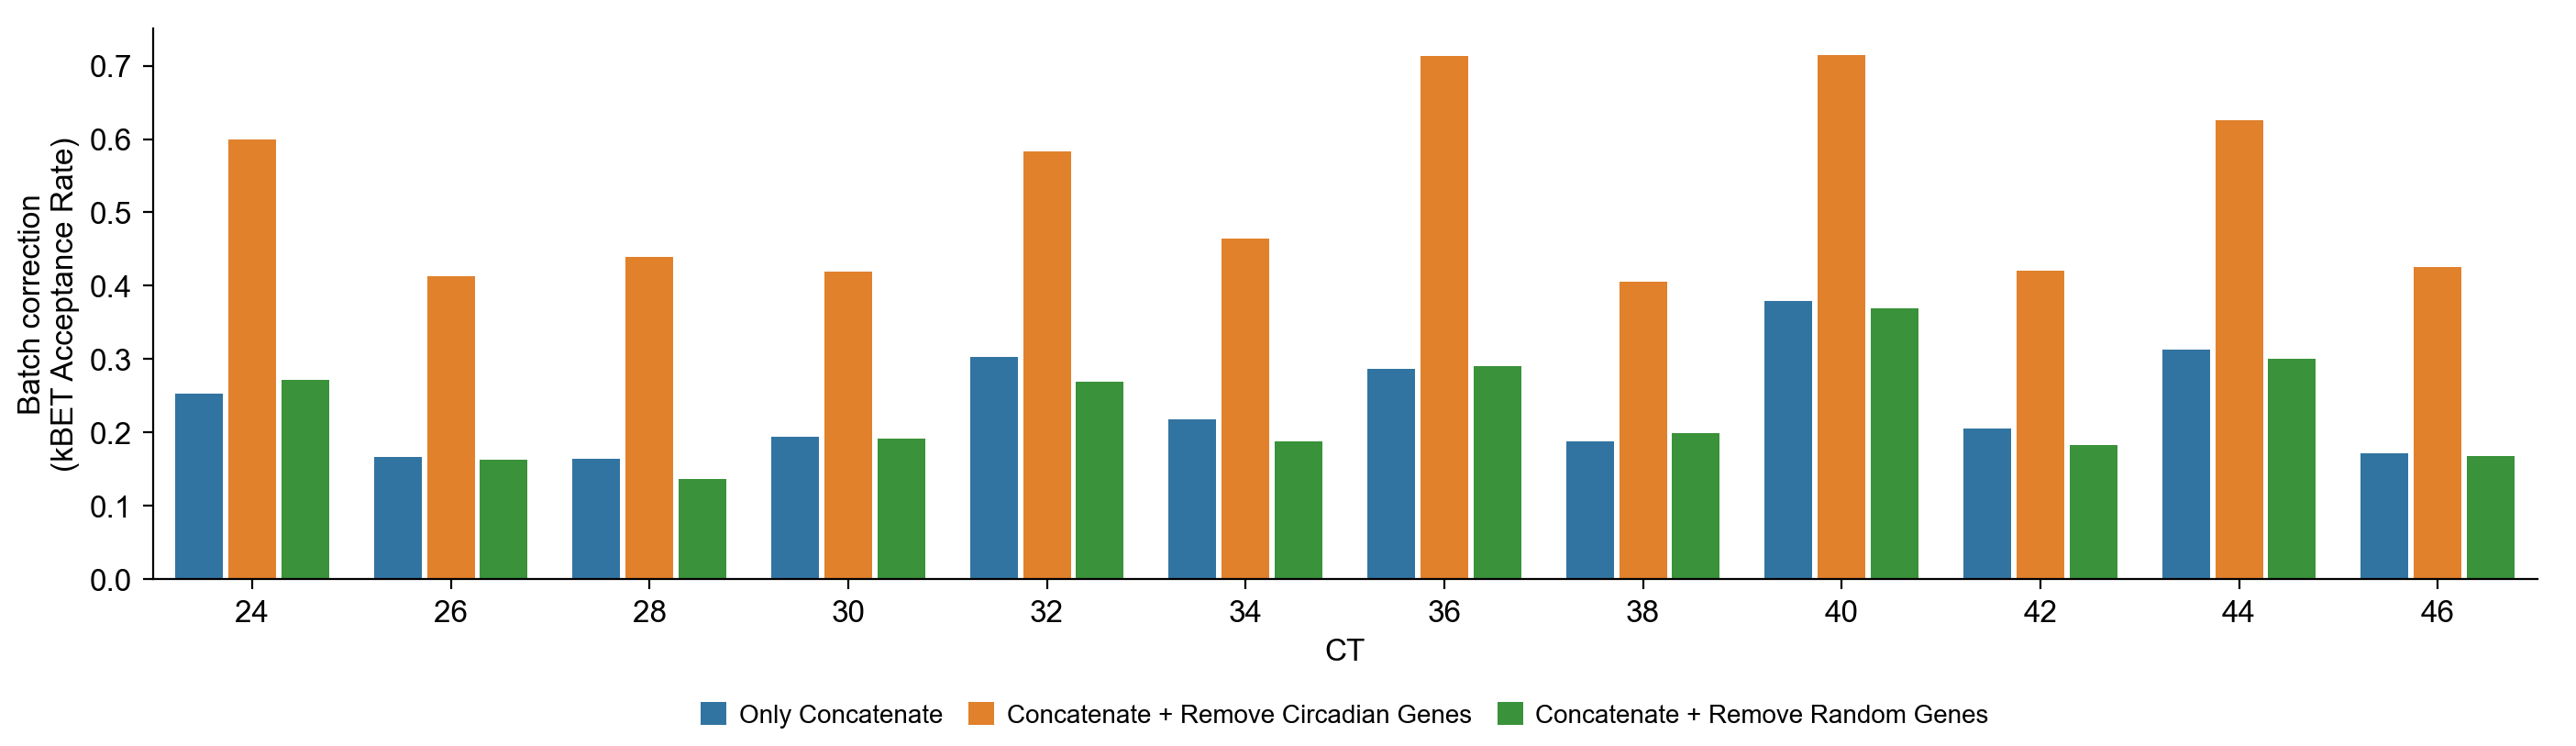

In [ ]:
# fig, ax = plt.subplots(figsize=(12,5))
bk = pw.Brick(figsize=(13,3))
sns.barplot(_df, x='CT', y='AcceptanceRate', hue='method', ax=bk, hue_order=_ls_order, gap=0.1)
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Batch correction\n(kBET Acceptance Rate)")
bk2 = bk
pwShow(bk2)

In [ ]:
bk1.get_legend().remove()

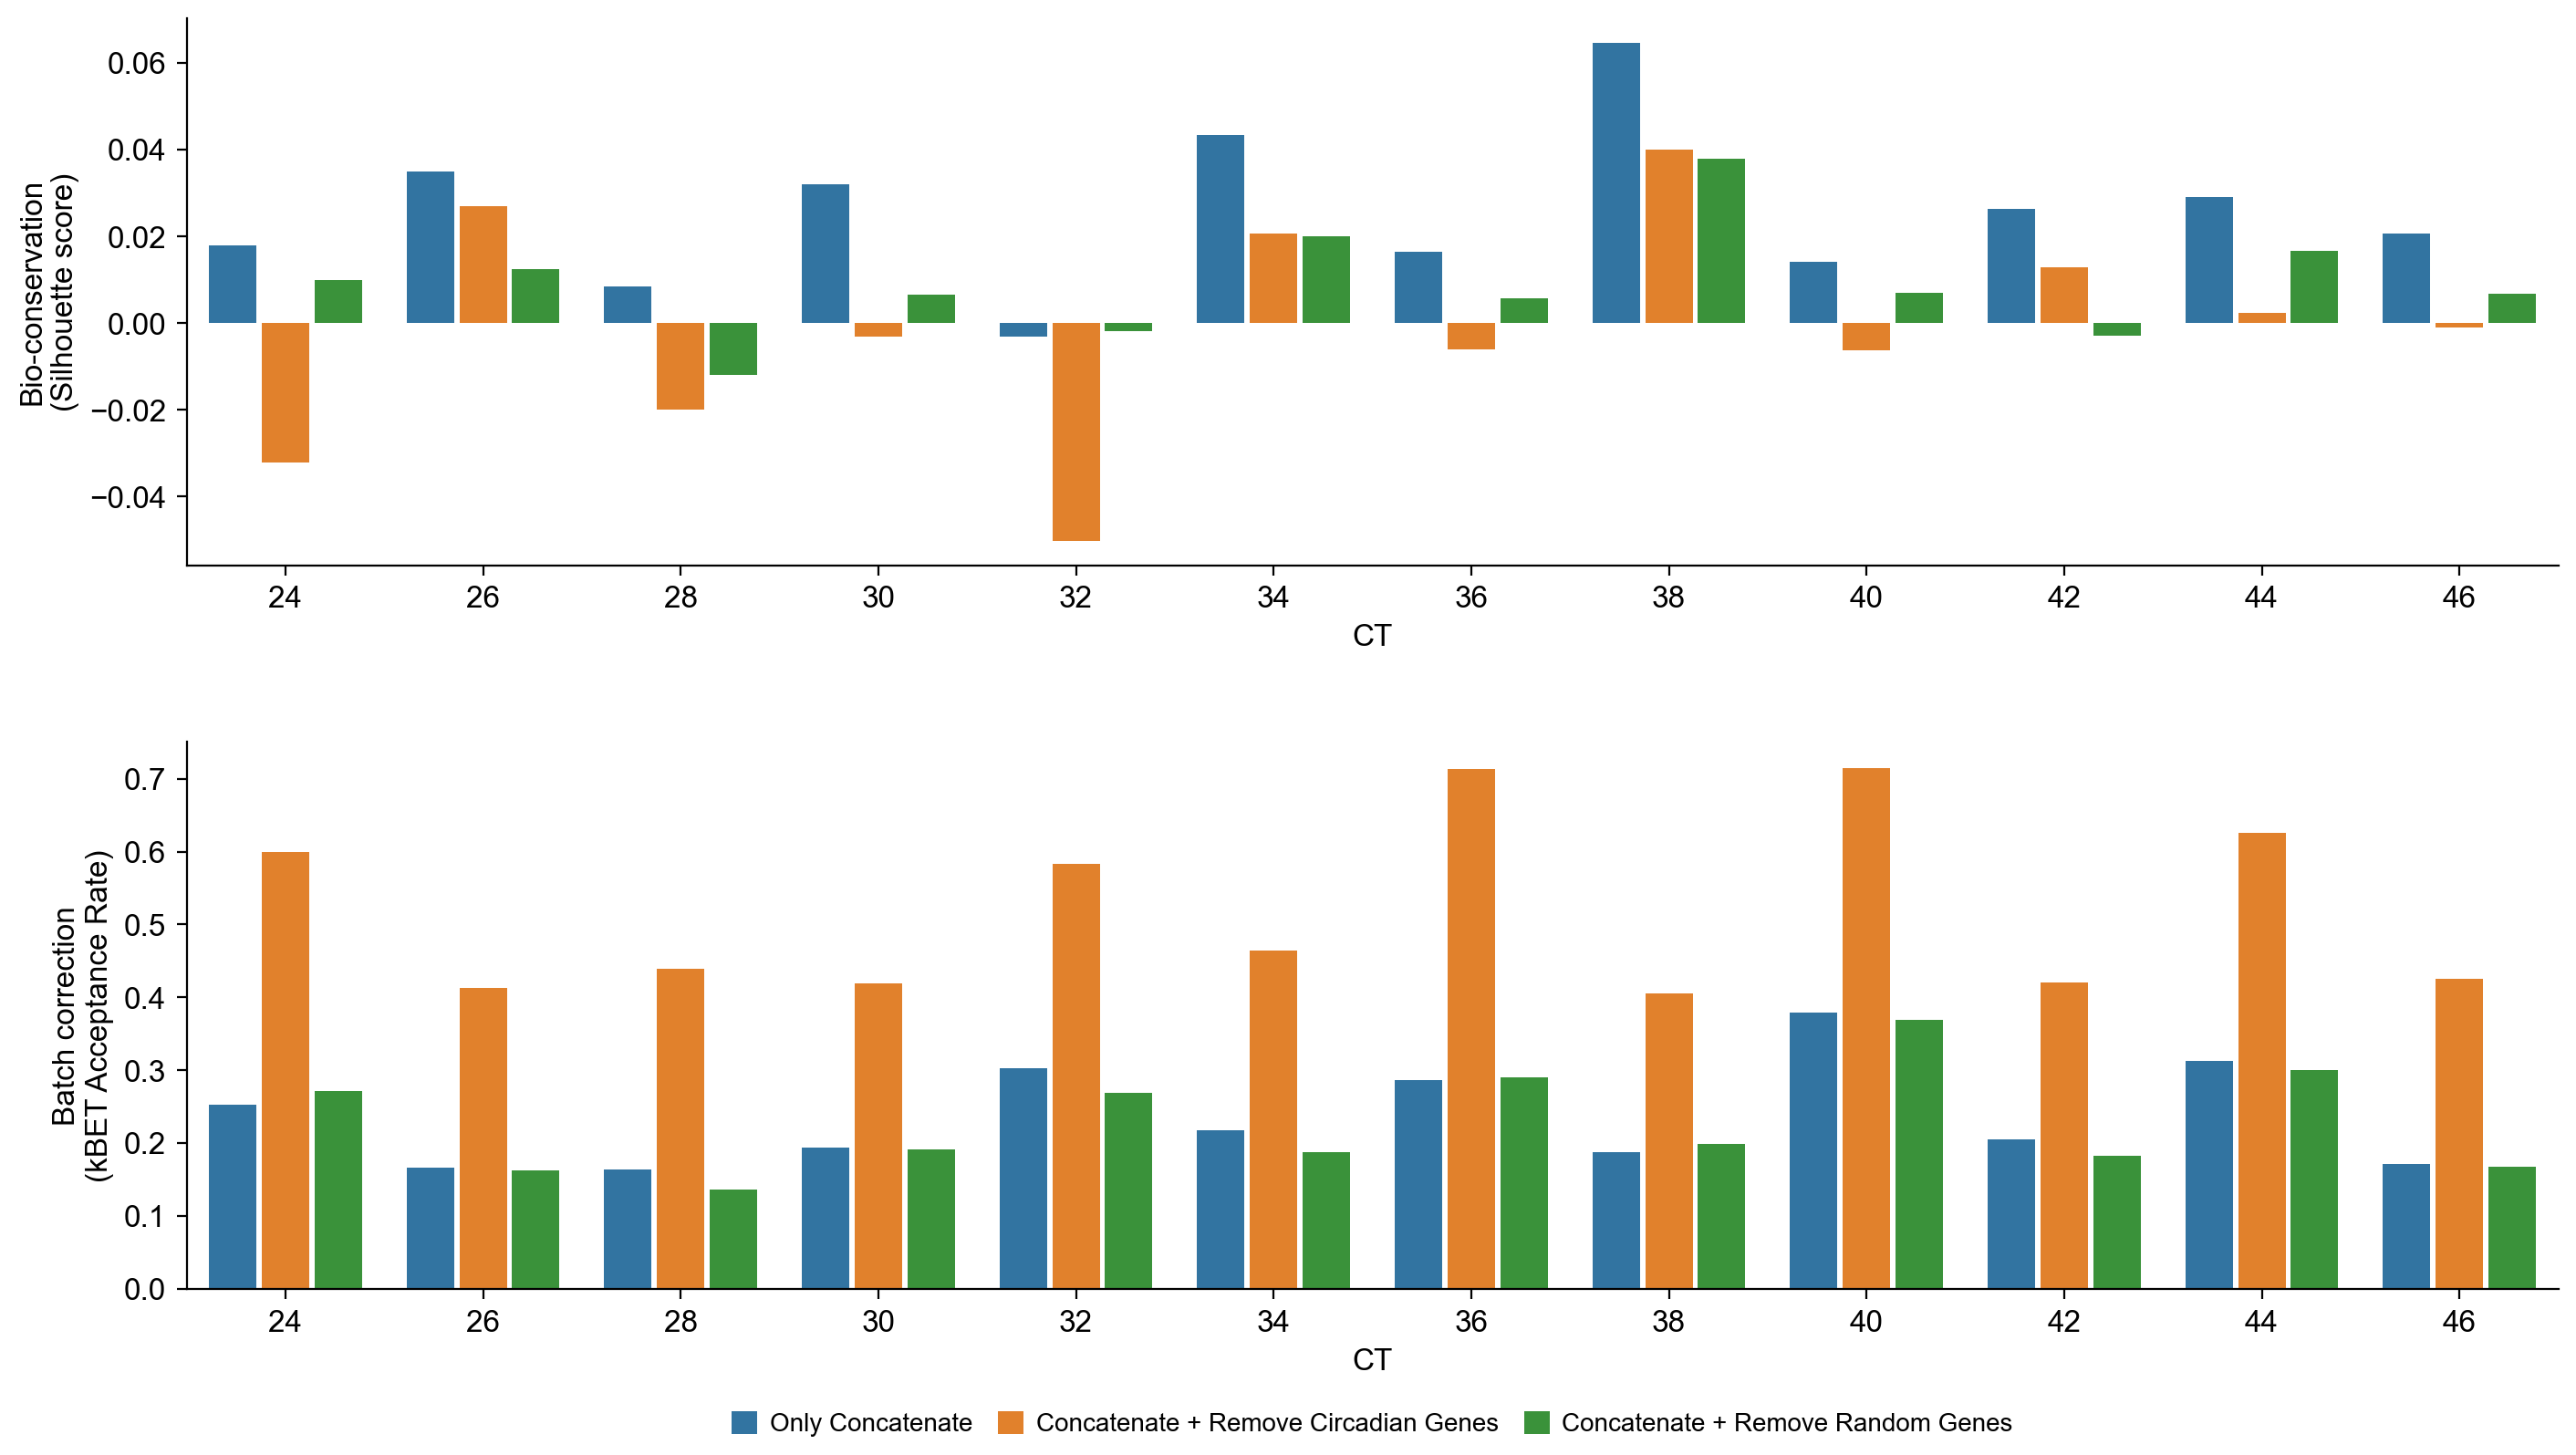

In [ ]:
pwShow(bk1 / bk2)

In [ ]:
_ls_order = pd.Series(_ls_order).str.replace('Regress', 'Regress Out').str.wrap(40)

2023-12-07 18:40:43 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


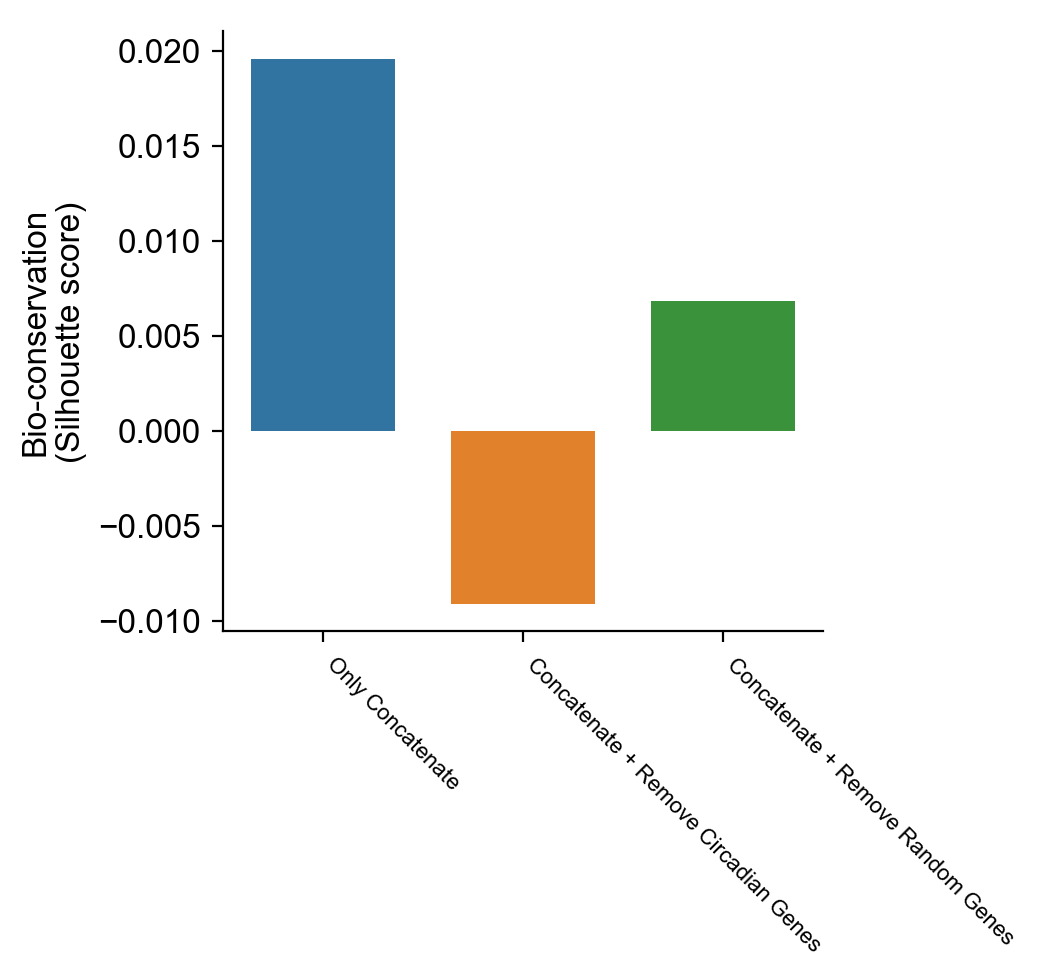

In [ ]:
_df = df_silhouette.assign(method=lambda _: _.method.str.replace('Regress', 'Regress Out').str.wrap(40)).groupby(["method"])['silhouette'].agg('mean').rename("silhouette").reset_index()
bk = pw.Brick(figsize=(3,3))
sns.barplot(_df, x='method', y='silhouette', hue='method', ax=bk, order=_ls_order, gap=0.1, palette={x:y for x,y in zip(_ls_order, sns.palettes.color_palette())})
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Bio-conservation\n(Silhouette score)")
bk.set_xticklabels(bk.get_xticklabels(), rotation=-45, ha='left', fontsize=8, ma='left')
bk.set_xlabel('')
bk1 = bk
pwShow(bk1)

2023-12-07 18:40:46 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


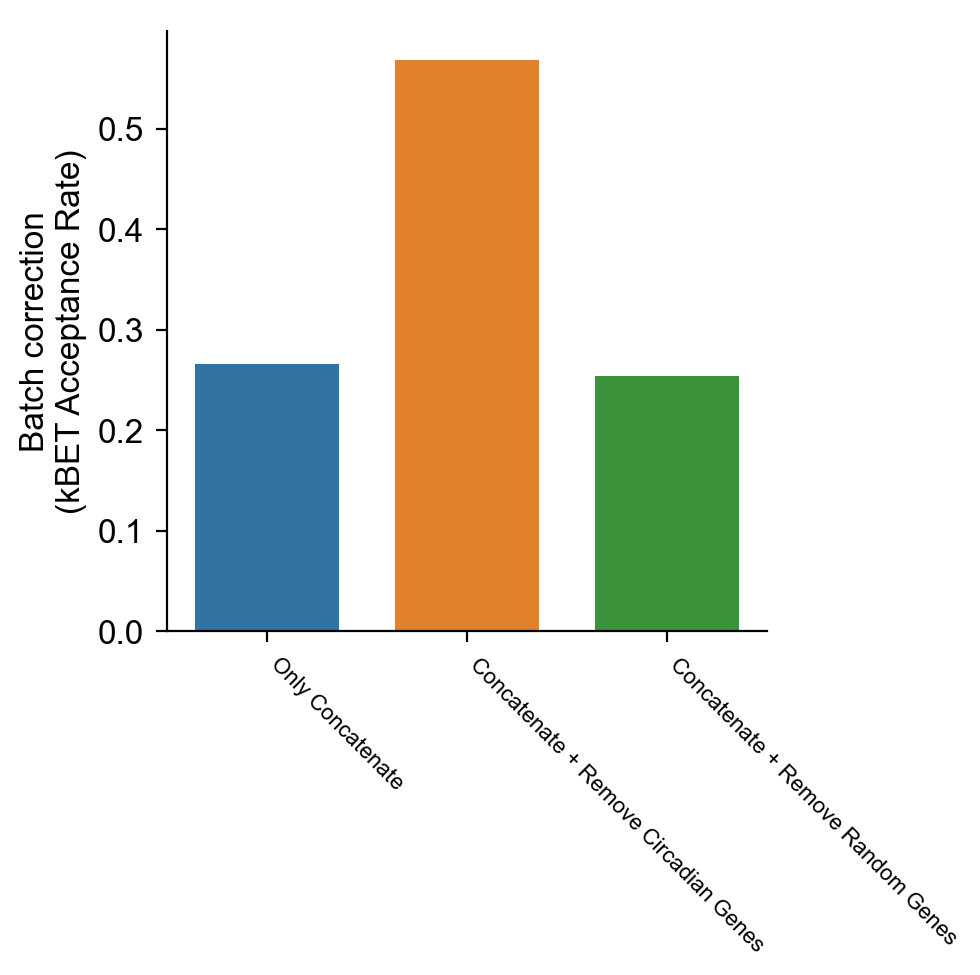

In [ ]:
_df = df_kbet.assign(method=lambda _: _.method.str.replace('Regress', 'Regress Out').str.wrap(40)).groupby(["method"])['pvalue'].agg(lambda _: (_ >= 0.05).mean()).rename("AcceptanceRate").reset_index()
bk = pw.Brick(figsize=(3,3))
sns.barplot(_df, x='method', y='AcceptanceRate', hue='method', ax=bk, order=_ls_order, gap=0.1, palette={x:y for x,y in zip(_ls_order, sns.palettes.color_palette())})
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Batch correction\n(kBET Acceptance Rate)")
bk.set_xticklabels(bk.get_xticklabels(), rotation=-45, ha='left', fontsize=8, ma='left')
bk.set_xlabel('')
bk2 = bk
pwShow(bk2)

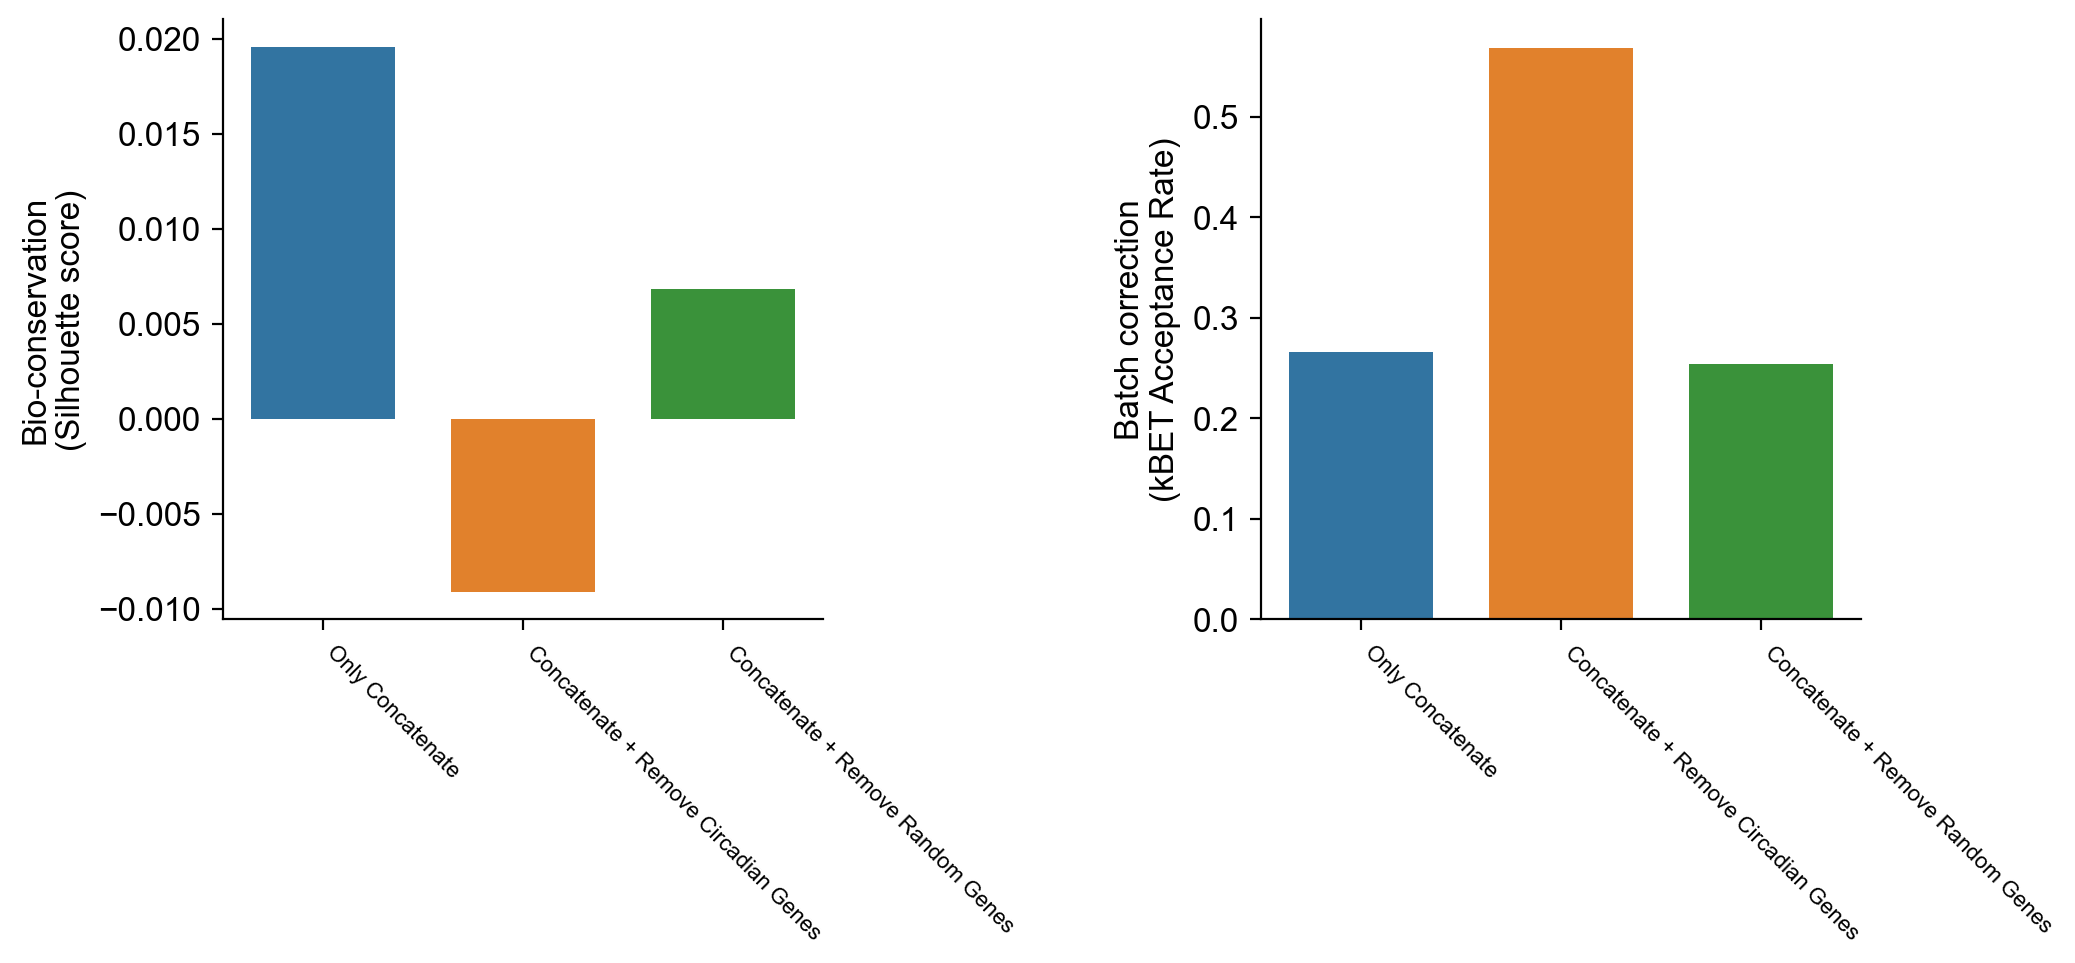

In [ ]:
pwShow(bk1 + bk2)

2023-12-07 18:58:33 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


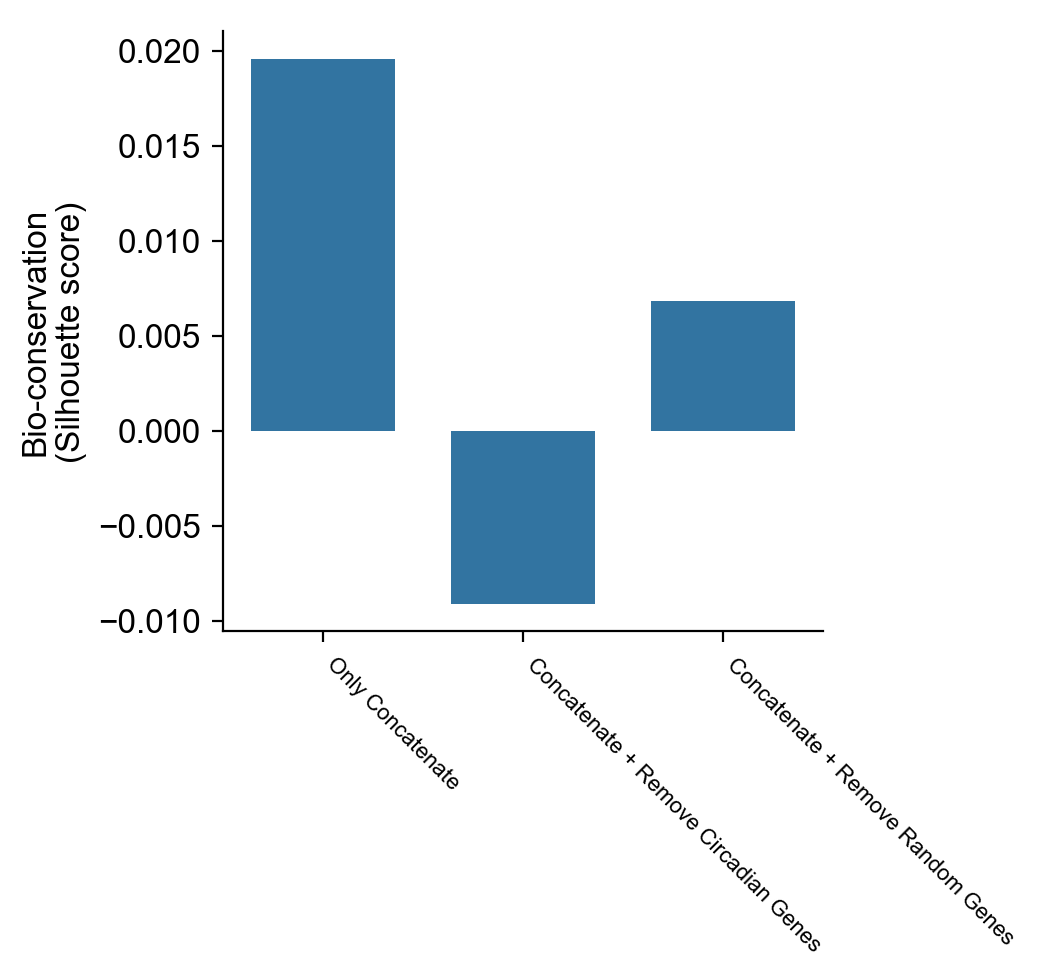

In [ ]:
_df = df_silhouette.assign(method=lambda _: _.method.str.replace('Regress', 'Regress Out').str.wrap(40)).groupby(["method"])['silhouette'].agg('mean').rename("silhouette").reset_index()
bk = pw.Brick(figsize=(3,3))
sns.barplot(_df, x='method', y='silhouette', ax=bk, order=_ls_order, gap=0.1)
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Bio-conservation\n(Silhouette score)")
bk.set_xticklabels(bk.get_xticklabels(), rotation=-45, ha='left', fontsize=8, ma='left')
bk.set_xlabel('')
bk1 = bk
pwShow(bk1)

2023-12-07 18:58:44 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


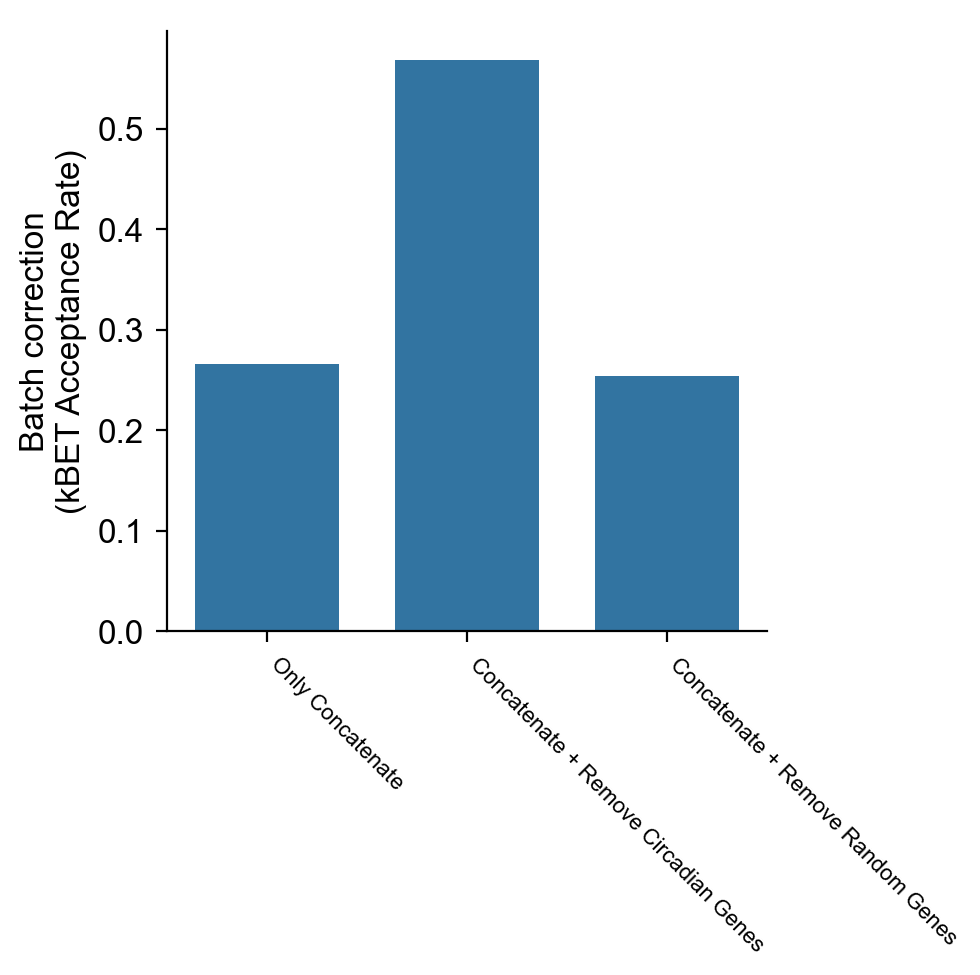

In [ ]:
_df = df_kbet.assign(method=lambda _: _.method.str.replace('Regress', 'Regress Out').str.wrap(40)).groupby(["method"])['pvalue'].agg(lambda _: (_ >= 0.05).mean()).rename("AcceptanceRate").reset_index()
bk = pw.Brick(figsize=(3,3))
sns.barplot(_df, x='method', y='AcceptanceRate', ax=bk, order=_ls_order, gap=0.1)
bk.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
bk.spines[['right', 'top']].set_visible(False)
bk.set_ylabel("Batch correction\n(kBET Acceptance Rate)")
bk.set_xticklabels(bk.get_xticklabels(), rotation=-45, ha='left', fontsize=8, ma='left')
bk.set_xlabel('')
bk2 = bk
pwShow(bk2)

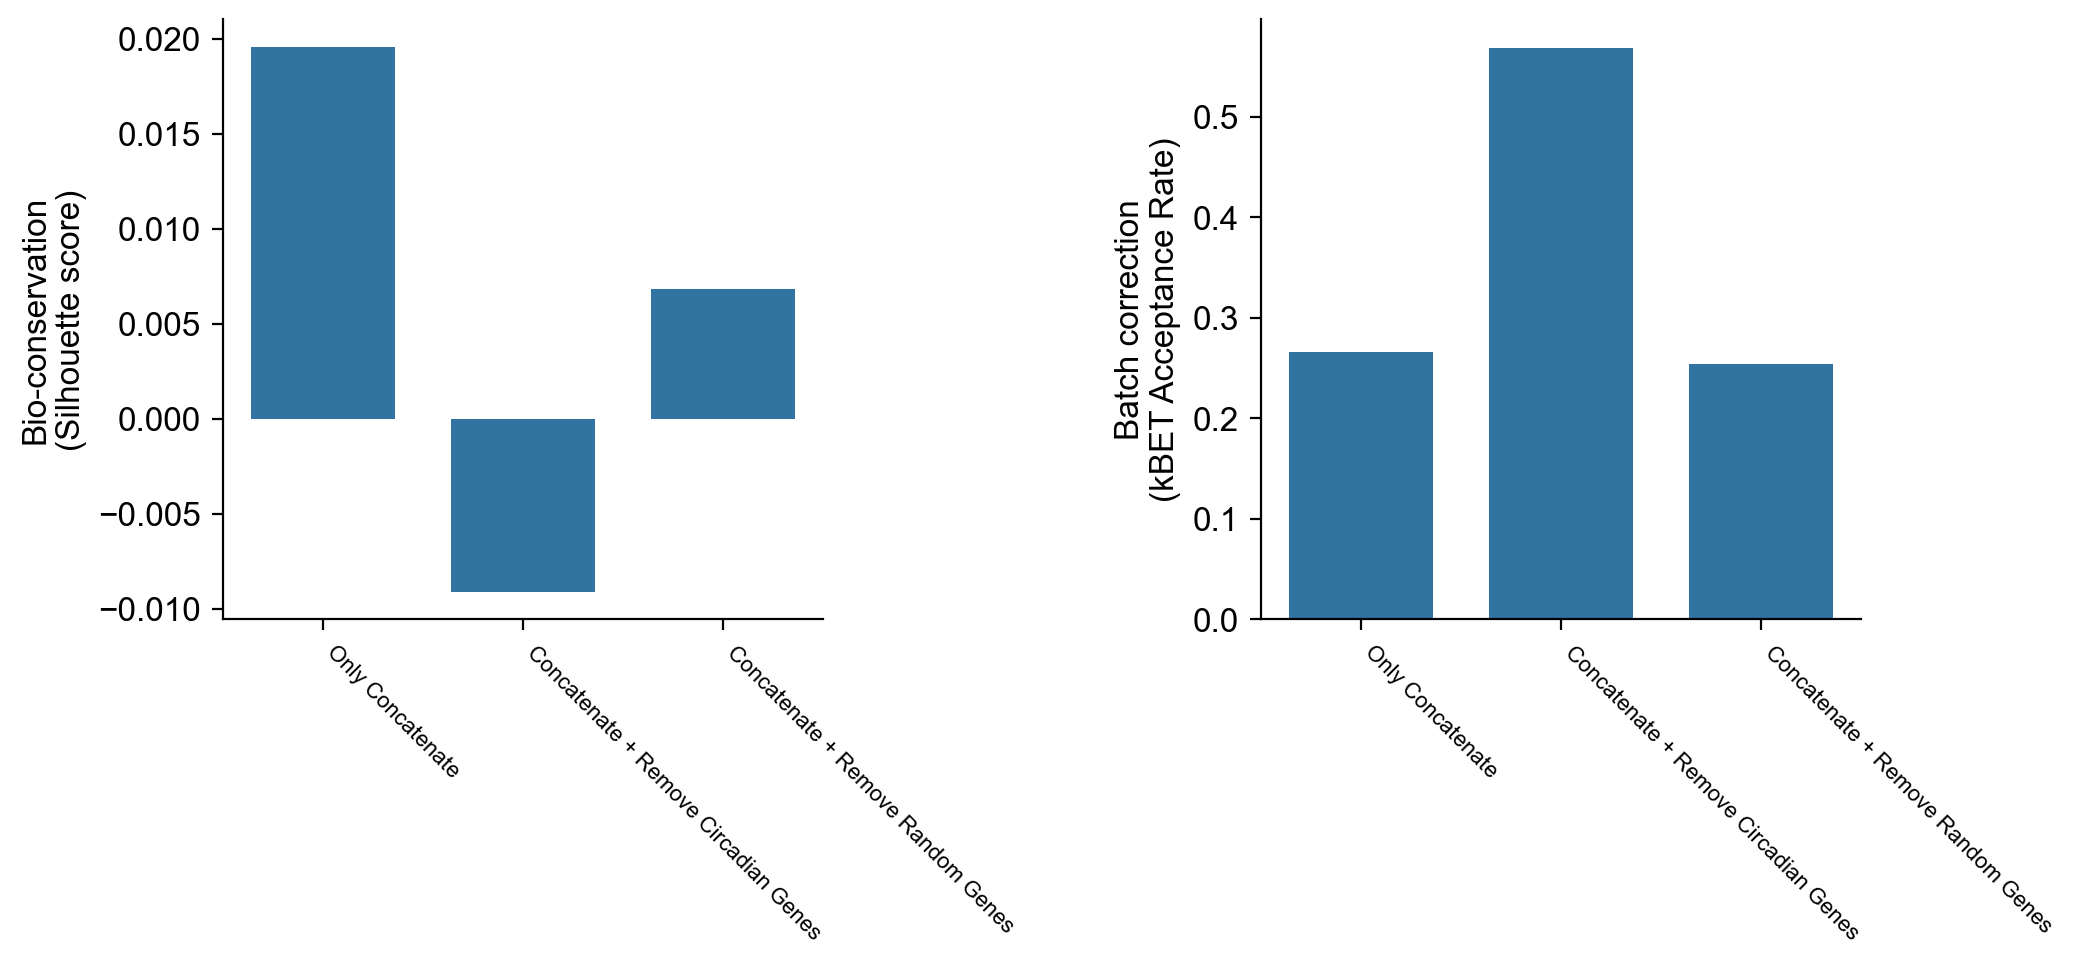

In [ ]:
pwShow(bk1 + bk2)